# **Information**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Donations/NYC City Agency Donations.csv')

# **1. Data Cleanup**



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Year                                4568 non-null   int64 
 1   Agency Name                         4568 non-null   object
 2   Name of Donor (Individual or Firm)  4568 non-null   object
 3   Type of Donation                    4346 non-null   object
 4   Value of Donation                   4343 non-null   object
dtypes: int64(1), object(4)
memory usage: 178.6+ KB


In [4]:
df.head()

,Year,Agency Name,Name of Donor (Individual or Firm),Type of Donation,Value of Donation
0,2019,Administration for Children's Services,Rx Plus Pharmacy,In-Kind,"$12,564.00"
1,2019,Administration for Children's Services,Glam4Good,In-Kind,"$27,462.00"
2,2019,Administration for Children's Services,Pajamas & Book Program,In-Kind,"$24,388.00"
3,2019,Administration for Children's Services,Tickets for Kids,In-Kind,"$89,779.00"
4,2019,Administration for Children's Services,New York Mets,In-Kind,"$12,750.00"


In [5]:
# Get the number of unique values in the 'Category' column
number_of_donor = df['Name of Donor (Individual or Firm)'].nunique()

print("Number of donor:", number_of_donor)
# Get the number of unique values in the 'Category' column
number_of_agency = df['Agency Name'].nunique()

print("Number of agency:", number_of_agency)

Number of donor: 3571
Number of agency: 141


In [6]:
def categorize_agency_reduced(agency_name):
    if 'Education' in agency_name:
        return 'Education'
    elif 'Cultural Affairs' in agency_name:
        return 'Cultural Affairs'
    elif any(x in agency_name for x in ['Health and Hospitals', 'Health and Mental Hygiene']):
        return 'Health Services'
    elif 'Parks' in agency_name:
        return 'Parks and Recreation'
    elif 'Borough President' in agency_name:
        return 'Borough Leadership'
    elif any(x in agency_name for x in ['Mayor', 'Public Advocate']):
        return 'City Leadership'
    elif any(x in agency_name for x in ['Police', 'Fire', 'Correction', 'Probation', 'Sanitation']):
        return 'Public Safety'
    elif any(x in agency_name for x in ['Homeless Services', 'Social Services', 'Human Resources Administration', 'Veterans', 'Administration for Children']):
        return 'Homess and Social Services and Childrens Services'
    elif any(x in agency_name for x in ['Law', 'District Attorney', 'Conflicts of Interest', 'Equal Employment', 'Civil Service']):
        return 'Legal and Law'
    elif any(x in agency_name for x in ['Housing Authority', 'Housing Preservation', 'Housing Development']):
        return 'Housing and Development'
    elif any(x in agency_name for x in ['Environmental Protection', 'Buildings', 'Landmarks', 'Records']):
        return 'Environmental Services'
    elif any(x in agency_name for x in ['Economic Development', 'Finance', 'Comptroller']):
        return 'Economic and Finance'
    elif any(x in agency_name for x in ['Information Technology', 'Technology and Innovation']):
        return 'Technology and Innovation'
    elif any(x in agency_name for x in ['City Council', 'Public Design']):
        return 'City Governance'
    else:
        return 'Other'

df['Agency Category'] = df['Agency Name'].apply(categorize_agency_reduced)


In [7]:
agency_counts = df['Agency Category'].value_counts()
print(agency_counts)


Agency Category
Education                                            2523
Cultural Affairs                                      448
Health Services                                       356
Parks and Recreation                                  337
Other                                                 305
Homess and Social Services and Childrens Services     197
Public Safety                                          85
Borough Leadership                                     73
Legal and Law                                          68
City Leadership                                        52
Housing and Development                                45
City Governance                                        25
Environmental Services                                 22
Economic and Finance                                   22
Technology and Innovation                              10
Name: count, dtype: int64


In [8]:
unique_donation_types = df['Type of Donation'].unique()
print(unique_donation_types)


['In-Kind' nan 'In Kind- Room rent waiver'
 'In Kind- Room rent waiver$10,000' 'In Kind-Room rent waiver' 'Money'
 'Both' 'In Kind'
 'Funding to CUNY Research Foundation/CUNY Institute for State and Local Governance for Strategic Planning/Restructurig Efforts at the Board of Correction'
 'Funding to consultant Bennett Midland for Strategic Planning/Restructuring efforts at Board of Correction'
 'Advertising space' 'In-Kind; Waiver of Rent'
 '1 Case Large Gloves 1000 qty' '59 Cases for medium Gloves 1k each'
 'Gloves' 'KN95' 'Disposable masks' 'Face shields'
 'Non-Surgical Disposable Masks' 'Hand Sanitizer- 80% alcohol'
 'Isolation Gowns' 'Shoe Covers' 'Surgical Masks' 'Disinfectant Wipes'
 'KN95 Masks' '3 ply disposable masks' 'Non-Surgical Nitrile Gloves'
 'Tyxex  Suit' 'Non-Surgical Ambu bags' 'Ventilators' 'Hand Sanitizer'
 'Non-Surgical Face Shields' 'Non-surgical Face Shields'
 'Non-Surgical Tyxex  Suit' 'Ponchos' 'Gowns' 'Plastic Face shields'
 'Surgical Face Masks' 'N95 Respirat

In [9]:
def categorize_donation_type(donation_type):
    if isinstance(donation_type, str):
        donation_type = donation_type.lower()
        if any(x in donation_type for x in ['money', 'stock', 'funding', 'monetary', 'gift card']):
            return 'Monetary Donation'
        elif any(x in donation_type for x in ['in-kind', 'in kind', 'service']):
            return 'In-Kind Donation'
        elif any(x in donation_type for x in ['glove', 'mask', 'gown', 'ppe', 'face shield', 'coverall', 'hand sanitizer', 'disinfectant', 'thermometer', 'ventilator', 'scrub']):
            return 'Personal Protective Equipment (PPE)'
        else:
            return 'Other'
    else:
        return 'Other'  # Categorize non-string types as 'Other'

df['Donation Type'] = df['Type of Donation'].apply(categorize_donation_type)


In [10]:
donation_category_counts = df['Donation Type'].value_counts()
print(donation_category_counts)


Donation Type
Monetary Donation                      3120
In-Kind Donation                       1058
Other                                   269
Personal Protective Equipment (PPE)     121
Name: count, dtype: int64


In [11]:
df = df.drop('Type of Donation', axis=1)


In [12]:
df.head()

,Year,Agency Name,Name of Donor (Individual or Firm),Value of Donation,Agency Category,Donation Type
0,2019,Administration for Children's Services,Rx Plus Pharmacy,"$12,564.00",Homess and Social Services and Childrens Services,In-Kind Donation
1,2019,Administration for Children's Services,Glam4Good,"$27,462.00",Homess and Social Services and Childrens Services,In-Kind Donation
2,2019,Administration for Children's Services,Pajamas & Book Program,"$24,388.00",Homess and Social Services and Childrens Services,In-Kind Donation
3,2019,Administration for Children's Services,Tickets for Kids,"$89,779.00",Homess and Social Services and Childrens Services,In-Kind Donation
4,2019,Administration for Children's Services,New York Mets,"$12,750.00",Homess and Social Services and Childrens Services,In-Kind Donation


In [13]:
def clean_donation_value(value):
  if isinstance(value, str):
    value = value.replace('$', '').replace(',', '')
    if value.endswith('-'):
      value = value[:-1]
  try:
    return float(value)
  except:
    return 0.0

df['Value of Donation'] = df['Value of Donation'].apply(clean_donation_value)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4568 non-null   int64  
 1   Agency Name                         4568 non-null   object 
 2   Name of Donor (Individual or Firm)  4568 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4568 non-null   object 
 5   Donation Type                       4568 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 214.2+ KB


In [15]:
#Checking for any missing values
print(df.isnull().sum())

Year                                    0
Agency Name                             0
Name of Donor (Individual or Firm)      0
Value of Donation                     225
Agency Category                         0
Donation Type                           0
dtype: int64


In [16]:
df.dropna(subset=['Donation Type'], inplace=True)
df.dropna(subset=['Value of Donation'], inplace=True)
df = df[df['Name of Donor (Individual or Firm)'] != 'No donations to report']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4343 non-null   int64  
 1   Agency Name                         4343 non-null   object 
 2   Name of Donor (Individual or Firm)  4343 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4343 non-null   object 
 5   Donation Type                       4343 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 237.5+ KB


# **1.1 Data Simulation**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4343 non-null   int64  
 1   Agency Name                         4343 non-null   object 
 2   Name of Donor (Individual or Firm)  4343 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4343 non-null   object 
 5   Donation Type                       4343 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 237.5+ KB


In [19]:
# Create a dictionary to map donor names to unique IDs
unique_donor_ids = {donor: f'DONOR_{i+1}' for i, donor in enumerate(df['Name of Donor (Individual or Firm)'].unique())}

# Map the donor names in the DataFrame to their unique IDs
df['Unique Identifier'] = df['Name of Donor (Individual or Firm)'].map(unique_donor_ids)


In [20]:
# prompt: find the total unique count of Name of Donor (Individual or Firm) and Unique Identifier column

total_unique_donor_id_count = df[['Unique Identifier']].nunique().sum()
print("Total unique count:", total_unique_donor_id_count)


Total unique count: 3567


In [21]:
# prompt: find the total unique count of Name of Donor (Individual or Firm) and Unique Identifier column

total_unique_donor_name_count = df[['Name of Donor (Individual or Firm)']].nunique().sum()
print("Total unique Donor Name count:", total_unique_donor_name_count)

Total unique Donor Name count: 3567


In [22]:
# Find duplicate entries in the Unique Identifier column
duplicates = df['Unique Identifier'].duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

print(f"Number of duplicate Unique Identifiers: {num_duplicates}")


Number of duplicate Unique Identifiers: 776


In [23]:
# Find duplicate entries in the Unique Identifier column
duplicates1 = df['Name of Donor (Individual or Firm)'].duplicated()

# Count the number of duplicates
num_duplicates1 = duplicates1.sum()

print(f"Number of duplicate Name of Donor (Individual or Firm): {num_duplicates}")

Number of duplicate Name of Donor (Individual or Firm): 776


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4343 non-null   int64  
 1   Agency Name                         4343 non-null   object 
 2   Name of Donor (Individual or Firm)  4343 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4343 non-null   object 
 5   Donation Type                       4343 non-null   object 
 6   Unique Identifier                   4343 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 271.4+ KB


In [25]:
import numpy as np
import pandas as pd

# Step 1: Create a dictionary mapping each unique identifier to a gender
unique_identifiers = df['Unique Identifier'].unique()
# Generate random gender assignments based on the 60% female, 40% male distribution
gender_choices = np.random.choice(['Female', 'Male'], size=len(unique_identifiers), p=[0.6, 0.4])
identifier_to_gender = dict(zip(unique_identifiers, gender_choices))

# Step 2: Map the gender back to the DataFrame
df['Gender'] = df['Unique Identifier'].map(identifier_to_gender)

# Verify the distribution
print(df['Gender'].value_counts(normalize=True))


Gender
Female    0.601428
Male      0.398572
Name: proportion, dtype: float64


In [26]:
import numpy as np

# Define the number of unique identifiers
num_identifiers = len(df['Unique Identifier'].unique())

# Generate random ages
# 85% between 18 and 45
ages_85_percent = np.random.randint(18, 46, size=int(num_identifiers * 0.85))
# 15% between 46 and 65
ages_15_percent = np.random.randint(46, 66, size=int(num_identifiers * 0.15))

# Combine the two age distributions
ages = np.concatenate([ages_85_percent, ages_15_percent])
# Shuffle the combined array
np.random.shuffle(ages)

# Create a mapping from unique identifiers to ages
unique_identifiers = df['Unique Identifier'].unique()
identifier_to_age = dict(zip(unique_identifiers, ages))

# Assign Age to the DataFrame
df['Age'] = df['Unique Identifier'].map(identifier_to_age)

# Generate and assign Education Level
education_distribution = np.random.choice(
    ['College', 'High School or Less', 'Masters Level', 'Doctorate'],
    size=len(unique_identifiers),
    p=[0.5, 0.2, 0.2, 0.1]
)
identifier_to_education = dict(zip(unique_identifiers, education_distribution))
df['Education Level'] = df['Unique Identifier'].map(identifier_to_education)

# Generate and assign Employment Status
employment_distribution = np.random.choice(
    ['Full-Time', 'Part-Time', 'Unemployed'],
    size=len(unique_identifiers),
    p=[0.85, 0.1, 0.05]
)
identifier_to_employment = dict(zip(unique_identifiers, employment_distribution))
df['Employment Status'] = df['Unique Identifier'].map(identifier_to_employment)

# Generate and assign Internet Access
internet_distribution = np.random.choice(
    ['Yes', 'No'],
    size=len(unique_identifiers),
    p=[0.85, 0.15]
)
identifier_to_internet = dict(zip(unique_identifiers, internet_distribution))
df['Internet Access'] = df['Unique Identifier'].map(identifier_to_internet)

# Verify the distributions
print(df['Age'].describe())
print(df['Education Level'].value_counts(normalize=True))
print(df['Employment Status'].value_counts(normalize=True))
print(df['Internet Access'].value_counts(normalize=True))



count    4342.000000
mean       35.222018
std        11.585186
min        18.000000
25%        26.000000
50%        34.000000
75%        42.000000
max        65.000000
Name: Age, dtype: float64
Education Level
College                0.505181
High School or Less    0.211144
Masters Level          0.204237
Doctorate              0.079438
Name: proportion, dtype: float64
Employment Status
Full-Time     0.833755
Part-Time     0.107760
Unemployed    0.058485
Name: proportion, dtype: float64
Internet Access
Yes    0.857011
No     0.142989
Name: proportion, dtype: float64


In [27]:
import pandas as pd
import numpy as np

# Create unique identifiers from the 'Unique Identifier' column
unique_identifiers = df['Unique Identifier'].unique()

# Marital Status
marital_status_distribution = np.random.choice(
    ['Single', 'Married', 'Divorced', 'Widowed'],
    size=len(unique_identifiers),
    p=[0.3, 0.6, 0.07, 0.03]
)
identifier_to_marital_status = dict(zip(unique_identifiers, marital_status_distribution))

# Ethnicity
ethnicity_distribution = np.random.choice(
    ['White', 'Hispanic or Latino', 'Black or African American', 'Asian', 'Other'],
    size=len(unique_identifiers),
    p=[0.6, 0.18, 0.12, 0.06, 0.04]
)
identifier_to_ethnicity = dict(zip(unique_identifiers, ethnicity_distribution))

# Location
location_distribution = np.random.choice(
    ['Urban', 'Suburban', 'Rural'],
    size=len(unique_identifiers),
    p=[0.7, 0.2, 0.1]
)
identifier_to_location = dict(zip(unique_identifiers, location_distribution))

# Assign these values to the DataFrame
df['Marital Status'] = df['Unique Identifier'].map(identifier_to_marital_status)
df['Ethnicity'] = df['Unique Identifier'].map(identifier_to_ethnicity)
df['Location'] = df['Unique Identifier'].map(identifier_to_location)

# Verify the distributions
print(df['Marital Status'].value_counts(normalize=True))
print(df['Ethnicity'].value_counts(normalize=True))
print(df['Location'].value_counts(normalize=True))


Marital Status
Married     0.607644
Single      0.290122
Divorced    0.070458
Widowed     0.031775
Name: proportion, dtype: float64
Ethnicity
White                        0.600276
Hispanic or Latino           0.174073
Black or African American    0.126180
Asian                        0.058255
Other                        0.041216
Name: proportion, dtype: float64
Location
Urban       0.704122
Suburban    0.194105
Rural       0.101773
Name: proportion, dtype: float64


In [28]:
total_unique_age_count = df[['Age']].nunique().sum()
print("Total unique age count:", total_unique_age_count)

Total unique age count: 48


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4343 non-null   int64  
 1   Agency Name                         4343 non-null   object 
 2   Name of Donor (Individual or Firm)  4343 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4343 non-null   object 
 5   Donation Type                       4343 non-null   object 
 6   Unique Identifier                   4343 non-null   object 
 7   Gender                              4343 non-null   object 
 8   Age                                 4342 non-null   float64
 9   Education Level                     4343 non-null   object 
 10  Employment Status                   4343 non-null   object 
 11  Internet Access                     4343 non-nul

In [30]:
from google.colab import files

# Convert the DataFrame to a CSV file
df.to_csv('donations_data.csv', encoding='utf-8', index=False)

# Download the CSV file
files.download('donations_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **1.2 EDA**

In [ ]:
df.head()

,Year,Agency Name,Name of Donor (Individual or Firm),Value of Donation,Agency Category,Donation Type,Unique Identifier,Gender,Age,Education Level,Employment Status,Internet Access,Marital Status,Ethnicity,Location
0,2019,Administration for Children's Services,Rx Plus Pharmacy,12564.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_1,Male,32.0,College,Full-Time,Yes,Widowed,White,Urban
1,2019,Administration for Children's Services,Glam4Good,27462.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_2,Male,38.0,Doctorate,Full-Time,Yes,Married,White,Urban
2,2019,Administration for Children's Services,Pajamas & Book Program,24388.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_3,Male,42.0,College,Full-Time,Yes,Married,White,Urban
3,2019,Administration for Children's Services,Tickets for Kids,89779.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_4,Male,29.0,College,Full-Time,Yes,Married,Hispanic or Latino,Urban
4,2019,Administration for Children's Services,New York Mets,12750.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_5,Male,30.0,College,Full-Time,Yes,Married,White,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4343 non-null   int64  
 1   Agency Name                         4343 non-null   object 
 2   Name of Donor (Individual or Firm)  4343 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4343 non-null   object 
 5   Donation Type                       4343 non-null   object 
 6   Unique Identifier                   4343 non-null   object 
 7   Gender                              4343 non-null   object 
 8   Age                                 4342 non-null   float64
 9   Education Level                     4343 non-null   object 
 10  Employment Status                   4343 non-null   object 
 11  Internet Access                     4343 non-nul

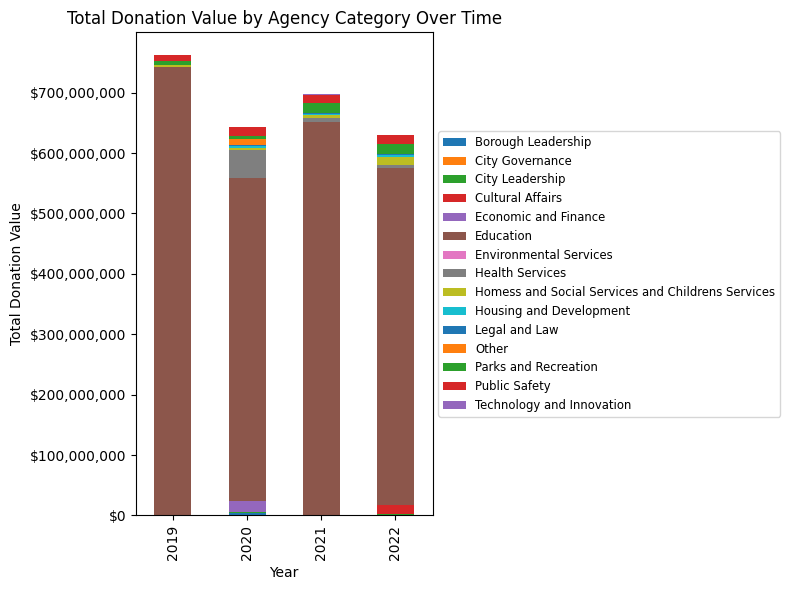

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group the data by year and agency category and sum the donation values
df_grouped = df.groupby(['Year', 'Agency Category'])['Value of Donation'].sum().unstack()

# Increase figure size to accommodate the legend
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Donation Value')
plt.title('Total Donation Value by Agency Category Over Time')

# Format the y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation

# Adjust the legend size and location
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Adjust the layout to make room for the legend without shrinking the chart
plt.tight_layout()

# Display the plot
plt.show()




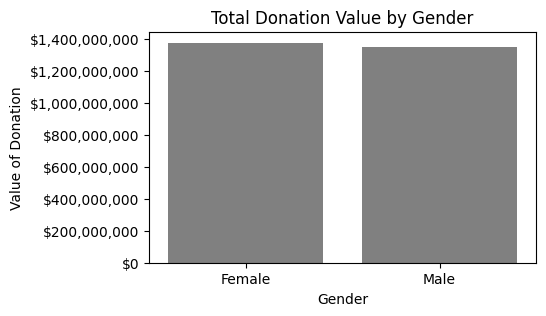

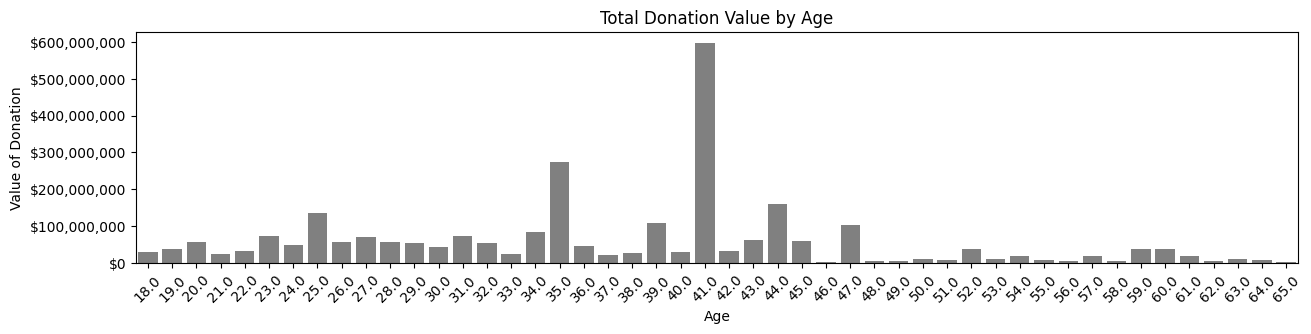

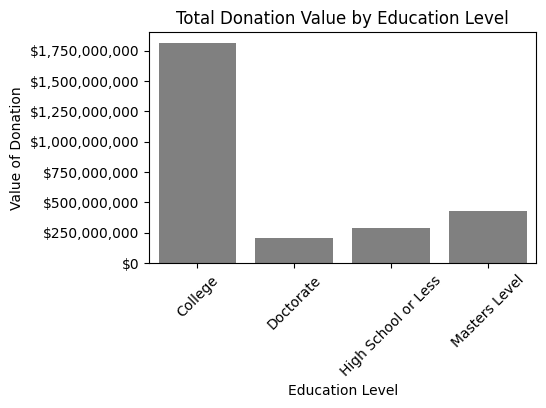

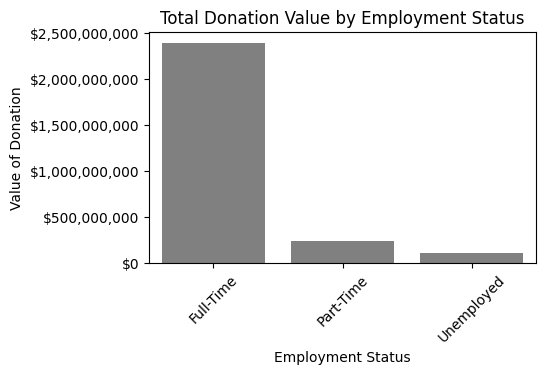

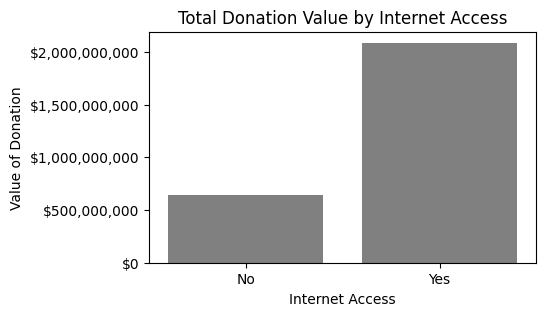

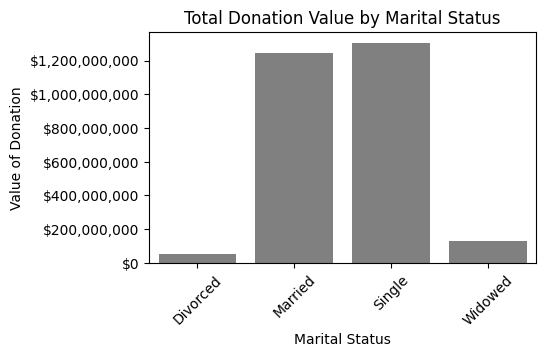

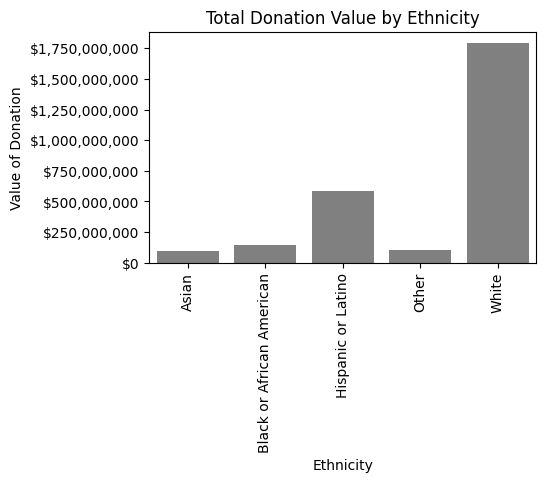

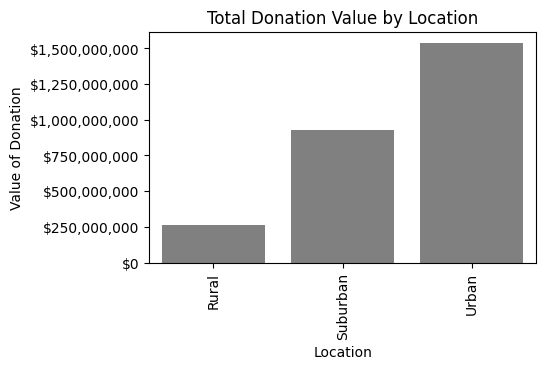

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Summarize data by categorical fields
gender_summary = df.groupby('Gender')['Value of Donation'].sum().reset_index()
age_summary = df.groupby('Age')['Value of Donation'].sum().reset_index()
education_summary = df.groupby('Education Level')['Value of Donation'].sum().reset_index()
employment_summary = df.groupby('Employment Status')['Value of Donation'].sum().reset_index()
internet_summary = df.groupby('Internet Access')['Value of Donation'].sum().reset_index()
marital_status_summary = df.groupby('Marital Status')['Value of Donation'].sum().reset_index()
ethnicity_summary = df.groupby('Ethnicity')['Value of Donation'].sum().reset_index()
location_summary = df.groupby('Location')['Value of Donation'].sum().reset_index()

# Visualize total donation value by Gender
plt.figure(figsize=(5, 3))
sns.barplot(x='Gender', y='Value of Donation', data=gender_summary, color='gray')
plt.title('Total Donation Value by Gender')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Age
plt.figure(figsize=(15, 3))
sns.barplot(x='Age', y='Value of Donation', data=age_summary, color='gray')
plt.title('Total Donation Value by Age')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Education Level
plt.figure(figsize=(5, 3))
sns.barplot(x='Education Level', y='Value of Donation', data=education_summary, color='gray')
plt.title('Total Donation Value by Education Level')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Employment Status
plt.figure(figsize=(5, 3))
sns.barplot(x='Employment Status', y='Value of Donation', data=employment_summary, color='gray')
plt.title('Total Donation Value by Employment Status')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Internet Access
plt.figure(figsize=(5, 3))
sns.barplot(x='Internet Access', y='Value of Donation', data=internet_summary, color='gray')
plt.title('Total Donation Value by Internet Access')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Marital Status
plt.figure(figsize=(5, 3))
sns.barplot(x='Marital Status', y='Value of Donation', data=marital_status_summary, color='gray')
plt.title('Total Donation Value by Marital Status')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Ethnicity
plt.figure(figsize=(5, 3))
sns.barplot(x='Ethnicity', y='Value of Donation', data=ethnicity_summary, color='gray')
plt.title('Total Donation Value by Ethnicity')
plt.xticks(rotation=90)  # Rotate labels if necessary
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()

# Visualize total donation value by Location
plt.figure(figsize=(5, 3))
sns.barplot(x='Location', y='Value of Donation', data=location_summary, color='gray')
plt.title('Total Donation Value by Location')
plt.xticks(rotation=90)  # Rotate labels if necessary
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Format y-axis to display full notation
plt.show()


    Year                                    Agency Category  Value of Donation
0   2019                                 Borough Leadership       1.804667e+04
1   2019                               Economic and Finance       2.013333e+04
2   2019                                          Education       7.088154e+05
3   2019                             Environmental Services       2.239966e+04
4   2019  Homess and Social Services and Childrens Services       5.483812e+04
5   2019                            Housing and Development       1.425513e+04
6   2019                                              Other       6.250000e+03
7   2019                               Parks and Recreation       5.698512e+04
8   2019                                      Public Safety       7.437075e+05
9   2020                                 Borough Leadership       9.830061e+04
10  2020                                    City Leadership       5.528425e+05
11  2020                               Economic and 

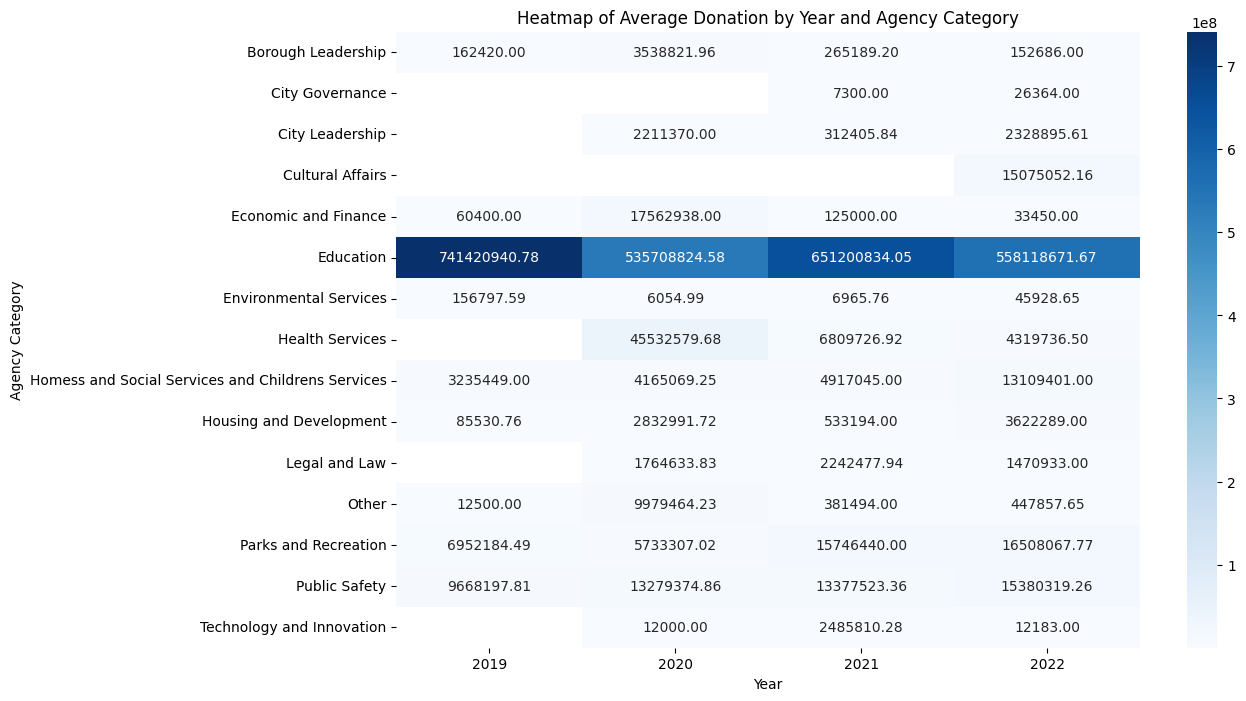

In [ ]:
#Example: Analyzing the average spent amount by Agency Category over the years
avg_donation_by_agency_year=df.groupby(['Year', 'Agency Category'])['Value of Donation'].mean().reset_index()
print(avg_donation_by_agency_year)

#Example: Heatmap of Value of Donation by year and Agency Category
pivot_table=df.pivot_table(values='Value of Donation', index='Agency Category', columns='Year', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='Blues')
plt.title('Heatmap of Average Donation by Year and Agency Category')
plt.show()

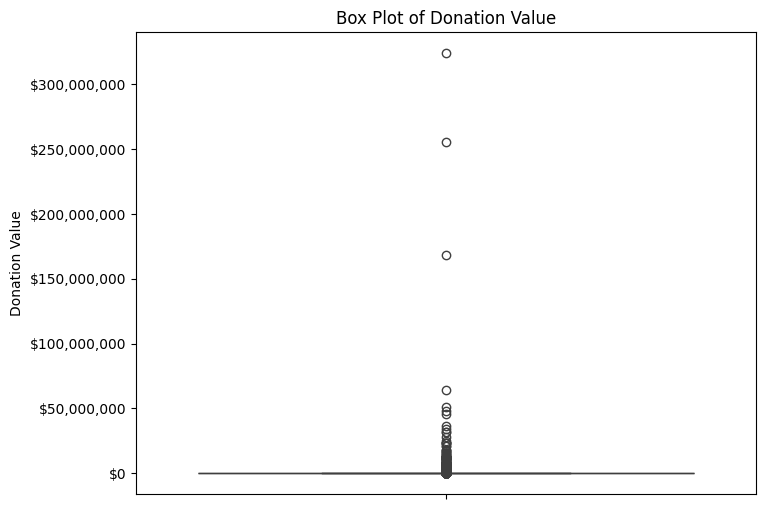

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Create a box plot of 'Value of Donation'
plt.figure(figsize=(8, 6))
sns.boxplot(y='Value of Donation', data=df)
plt.title('Box Plot of Donation Value')
plt.ylabel('Donation Value')

# Format y-axis to display full notation with a dollar sign
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()



In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of 'Value of Donation'
Q1 = df['Value of Donation'].quantile(0.25)
Q3 = df['Value of Donation'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Value of Donation'] < lower_bound) | (df['Value of Donation'] > upper_bound)]

# Display the outliers
print(f'Number of outliers: {len(outliers)}')
print(outliers.head())


Number of outliers: 614
    Year                Agency Name  \
69  2019  Education (Department of)   
70  2019  Education (Department of)   
75  2019  Education (Department of)   
78  2019  Education (Department of)   
79  2019  Education (Department of)   

                   Name of Donor (Individual or Firm)  Value of Donation  \
69  02M006 Parent Teacher Association of Lillie De...          803000.00   
70  02M006 Parent Teacher Association of Lillie De...          405000.00   
75         02M059 PTA of PS 59 ; PRIV PTA GRANT 06  0          547500.00   
78  02M077 The Lower Lab School Parent Teachers As...          840833.00   
79  02M116 Parents and Teachers Association of PS ...          550498.92   

   Agency Category      Donation Type Unique Identifier  Gender   Age  \
69       Education  Monetary Donation          DONOR_47  Female  60.0   
70       Education  Monetary Donation          DONOR_48    Male  43.0   
75       Education  Monetary Donation          DONOR_53    Male  

In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of 'Value of Donation'
Q1 = df['Value of Donation'].quantile(0.25)
Q3 = df['Value of Donation'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries for extreme outliers (using 3 times the IQR)
lower_bound_extreme = Q1 - 3 * IQR
upper_bound_extreme = Q3 + 3 * IQR

# Find extreme outliers
extreme_outliers = df[(df['Value of Donation'] < lower_bound_extreme) | (df['Value of Donation'] > upper_bound_extreme)]

# Display the extreme outliers
print(f'Number of extreme outliers: {len(extreme_outliers)}')
print(extreme_outliers.head())


Number of extreme outliers: 401
     Year                Agency Name  \
69   2019  Education (Department of)   
78   2019  Education (Department of)   
110  2019  Education (Department of)   
111  2019  Education (Department of)   
153  2019  Education (Department of)   

                    Name of Donor (Individual or Firm)  Value of Donation  \
69   02M006 Parent Teacher Association of Lillie De...          803000.00   
78   02M077 The Lower Lab School Parent Teachers As...          840833.00   
110  03M054 Middle School 54 PTA ; PRIV PTA GRANT 0...          780000.00   
111  03M084 The Fund for PS 84 Inc ; PRIVATE GRANT ...          626452.12   
153         15K321 PTA Donation ; PRIV PTA GRANT 02  9          615095.25   

    Agency Category      Donation Type Unique Identifier  Gender   Age  \
69        Education  Monetary Donation          DONOR_47  Female  60.0   
78        Education  Monetary Donation          DONOR_56  Female  18.0   
110       Education  Monetary Donation    

In [ ]:
import pandas as pd
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of 'Value of Donation'
Q1 = df['Value of Donation'].quantile(0.25)
Q3 = df['Value of Donation'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for Winsorizing
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorizing: cap the values at the lower and upper bounds
df['Value of Donation Winsorized'] = np.where(
    df['Value of Donation'] < lower_bound,
    lower_bound,
    np.where(df['Value of Donation'] > upper_bound,
             upper_bound,
             df['Value of Donation'])
)

# Verify changes
print(f'Number of entries: {len(df)}')
print(f'Number of unique values in Winsorized column: {df["Value of Donation Winsorized"].nunique()}')
print(df[['Value of Donation', 'Value of Donation Winsorized']].describe())

# Optional: Display outliers after Winsorizing
winsorized_outliers = df[(df['Value of Donation Winsorized'] < lower_bound) | (df['Value of Donation Winsorized'] > upper_bound)]
print(f'Number of Winsorized outliers: {len(winsorized_outliers)}')
print(winsorized_outliers.head())


Number of entries: 4343
Number of unique values in Winsorized column: 2025
       Value of Donation  Value of Donation Winsorized
count       4.343000e+03                   4343.000000
mean        6.293219e+05                 109643.586201
std         7.197053e+06                 136573.911040
min         0.000000e+00                      0.000000
25%         1.000000e+04                  10000.000000
50%         3.555000e+04                  35550.000000
75%         1.581400e+05                 158140.000000
max         3.239793e+08                 380350.000000
Number of Winsorized outliers: 0
Empty DataFrame
Columns: [Year, Agency Name, Name of Donor (Individual or Firm), Value of Donation, Agency Category, Donation Type, Unique Identifier, Gender, Age, Education Level, Employment Status, Internet Access, Marital Status, Ethnicity, Location, Value of Donation Winsorized]
Index: []


In [ ]:
# prompt: find the range of values in Value of Donation Winsorized

min_value = df['Value of Donation'].min()
max_value = df['Value of Donation'].max()

print(f"Range of Donation Values: {min_value} to {max_value}")

Range of Donation Values: 0.0 to 323979313.0


In [ ]:
# prompt: find the range of values in Value of Donation Winsorized

min_value = df['Value of Donation Winsorized'].min()
max_value = df['Value of Donation Winsorized'].max()

print(f"Range of Winsorized Donation Values: {min_value} to {max_value}")

Range of Winsorized Donation Values: 0.0 to 380350.0


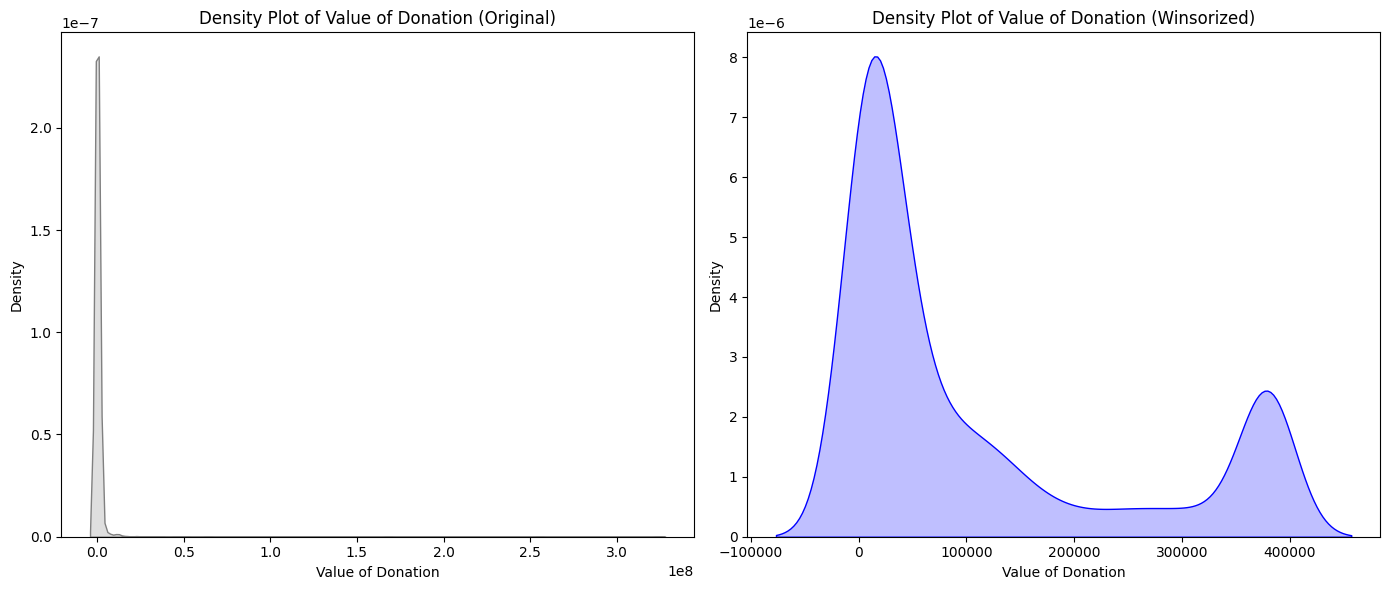

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot density plot of original data
plt.subplot(1, 2, 1)
sns.kdeplot(df['Value of Donation'], fill=True, color='gray')
plt.title('Density Plot of Value of Donation (Original)')
plt.xlabel('Value of Donation')
plt.ylabel('Density')

# Plot density plot of Winsorized data
plt.subplot(1, 2, 2)
sns.kdeplot(df['Value of Donation Winsorized'], fill=True, color='blue')
plt.title('Density Plot of Value of Donation (Winsorized)')
plt.xlabel('Value of Donation')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


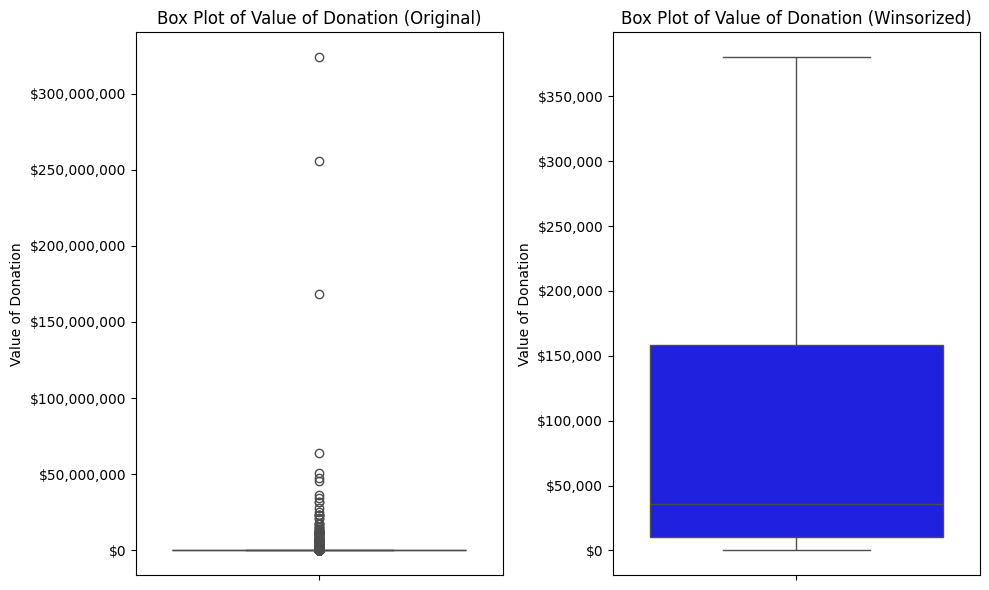

In [ ]:
import matplotlib.ticker as ticker

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot box plot of original data
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Value of Donation'], color='blue')
plt.title('Box Plot of Value of Donation (Original)')
plt.ylabel('Value of Donation')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Plot box plot of Winsorized data
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Value of Donation Winsorized'], color='blue')
plt.title('Box Plot of Value of Donation (Winsorized)')
plt.ylabel('Value of Donation')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()


# **1.3 Feature Engineering**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4343 non-null   int64  
 1   Agency Name                         4343 non-null   object 
 2   Name of Donor (Individual or Firm)  4343 non-null   object 
 3   Value of Donation                   4343 non-null   float64
 4   Agency Category                     4343 non-null   object 
 5   Donation Type                       4343 non-null   object 
 6   Unique Identifier                   4343 non-null   object 
 7   Gender                              4343 non-null   object 
 8   Age                                 4342 non-null   float64
 9   Education Level                     4343 non-null   object 
 10  Employment Status                   4343 non-null   object 
 11  Internet Access                     4343 non-nul

In [ ]:
# prompt: find the range of values in Value of Donation Winsorized

min_value = df['Value of Donation Winsorized'].min()
max_value = df['Value of Donation Winsorized'].max()

print(f"Range of Winsorized Donation Values: {min_value} to {max_value}")


Range of Winsorized Donation Values: 0.0 to 380350.0


In [ ]:
dffe = df.copy()

In [ ]:
import pandas as pd

# Adjust the bin edges to ensure all values are included
bins = [0, 5000, 50000, 380350.01]
labels = ['Low', 'Medium', 'High']

# Create the segmentation
dffe['Donation Segment'] = pd.cut(dffe['Value of Donation Winsorized'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify the segmentation
print(dffe[['Value of Donation Winsorized', 'Donation Segment']].head())


   Value of Donation Winsorized Donation Segment
0                       12564.0           Medium
1                       27462.0           Medium
2                       24388.0           Medium
3                       89779.0             High
4                       12750.0           Medium


In [ ]:
dffe

,Year,Agency Name,Name of Donor (Individual or Firm),Value of Donation,Agency Category,Donation Type,Unique Identifier,Gender,Age,Education Level,Employment Status,Internet Access,Marital Status,Ethnicity,Location,Value of Donation Winsorized,Donation Segment
0,2019,Administration for Children's Services,Rx Plus Pharmacy,12564.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_1,Male,32.0,College,Full-Time,Yes,Widowed,White,Urban,12564.0,Medium
1,2019,Administration for Children's Services,Glam4Good,27462.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_2,Male,38.0,Doctorate,Full-Time,Yes,Married,White,Urban,27462.0,Medium
2,2019,Administration for Children's Services,Pajamas & Book Program,24388.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_3,Male,42.0,College,Full-Time,Yes,Married,White,Urban,24388.0,Medium
3,2019,Administration for Children's Services,Tickets for Kids,89779.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_4,Male,29.0,College,Full-Time,Yes,Married,Hispanic or Latino,Urban,89779.0,High
4,2019,Administration for Children's Services,New York Mets,12750.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_5,Male,30.0,College,Full-Time,Yes,Married,White,Urban,12750.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,2022,Probation (Department of),Rethink Food,293798.0,Public Safety,In-Kind Donation,DONOR_2938,Male,30.0,College,Full-Time,Yes,Married,White,Suburban,293798.0,High
4558,2022,Small Business Services (Department of),HOUSING TRUST FUND CORP,50000.0,Other,Monetary Donation,DONOR_2940,Male,52.0,College,Part-Time,Yes,Single,White,Rural,50000.0,High
4559,2022,Small Business Services (Department of),NY Community Trust,180000.0,Other,Monetary Donation,DONOR_2640,Female,23.0,Masters Level,Full-Time,Yes,Single,Hispanic or Latino,Urban,180000.0,High
4564,2022,Veteran's Services (Department of),Iheart Media,152823.0,Other,In-Kind Donation,DONOR_3566,Female,42.0,Masters Level,Full-Time,Yes,Married,White,Urban,152823.0,High


In [ ]:
dffe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Year                                4343 non-null   int64   
 1   Agency Name                         4343 non-null   object  
 2   Name of Donor (Individual or Firm)  4343 non-null   object  
 3   Value of Donation                   4343 non-null   float64 
 4   Agency Category                     4343 non-null   object  
 5   Donation Type                       4343 non-null   object  
 6   Unique Identifier                   4343 non-null   object  
 7   Gender                              4343 non-null   object  
 8   Age                                 4342 non-null   float64 
 9   Education Level                     4343 non-null   object  
 10  Employment Status                   4343 non-null   object  
 11  Internet Access                    

In [ ]:
dffe['Donation Frequency'] = dffe.groupby('Name of Donor (Individual or Firm)')['Value of Donation'].transform('count')
high_value_threshold = 50000
dffe['High Value Donor'] = dffe['Value of Donation Winsorized'].apply(lambda x: 1 if x >= high_value_threshold else 0)
current_year = dffe['Year'].max()
dffe['Donation Recency'] = current_year - dffe['Year']
dffe['Engagement Score'] = (dffe['Donation Frequency'] + (1 / (1 + dffe['Donation Recency'])) + dffe['Value of Donation Winsorized']).rank(ascending=False)



In [ ]:
dffe.head()

,Year,Agency Name,Name of Donor (Individual or Firm),Value of Donation,Agency Category,Donation Type,Unique Identifier,Gender,Age,Education Level,...,Internet Access,Marital Status,Ethnicity,Location,Value of Donation Winsorized,Donation Segment,Donation Frequency,High Value Donor,Donation Recency,Engagement Score
0,2019,Administration for Children's Services,Rx Plus Pharmacy,12564.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_1,Male,32.0,College,...,Yes,Widowed,White,Urban,12564.0,Medium,1,0,3,2998.0
1,2019,Administration for Children's Services,Glam4Good,27462.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_2,Male,38.0,Doctorate,...,Yes,Married,White,Urban,27462.0,Medium,2,0,3,2374.0
2,2019,Administration for Children's Services,Pajamas & Book Program,24388.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_3,Male,42.0,College,...,Yes,Married,White,Urban,24388.0,Medium,2,0,3,2500.0
3,2019,Administration for Children's Services,Tickets for Kids,89779.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_4,Male,29.0,College,...,Yes,Married,Hispanic or Latino,Urban,89779.0,High,3,1,3,1569.0
4,2019,Administration for Children's Services,New York Mets,12750.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_5,Male,30.0,College,...,Yes,Married,White,Urban,12750.0,Medium,3,0,3,2991.0


In [ ]:
# prompt: find the range of Engagement Score

min_value = dffe['Engagement Score'].min()
max_value = dffe['Engagement Score'].max()

print(f"Range of Engagement Score: {min_value} to {max_value}")


Range of Engagement Score: 1.0 to 4341.0


In [ ]:
dffe['Scaled Engagement Score'] = 100 * (dffe['Engagement Score'] - dffe['Engagement Score'].min()) / (dffe['Engagement Score'].max() - dffe['Engagement Score'].min())


In [ ]:
dffe

,Year,Agency Name,Name of Donor (Individual or Firm),Value of Donation,Agency Category,Donation Type,Unique Identifier,Gender,Age,Education Level,...,Marital Status,Ethnicity,Location,Value of Donation Winsorized,Donation Segment,Donation Frequency,High Value Donor,Donation Recency,Engagement Score,Scaled Engagement Score
0,2019,Administration for Children's Services,Rx Plus Pharmacy,12564.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_1,Male,32.0,College,...,Widowed,White,Urban,12564.0,Medium,1,0,3,2998.0,69.055300
1,2019,Administration for Children's Services,Glam4Good,27462.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_2,Male,38.0,Doctorate,...,Married,White,Urban,27462.0,Medium,2,0,3,2374.0,54.677419
2,2019,Administration for Children's Services,Pajamas & Book Program,24388.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_3,Male,42.0,College,...,Married,White,Urban,24388.0,Medium,2,0,3,2500.0,57.580645
3,2019,Administration for Children's Services,Tickets for Kids,89779.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_4,Male,29.0,College,...,Married,Hispanic or Latino,Urban,89779.0,High,3,1,3,1569.0,36.129032
4,2019,Administration for Children's Services,New York Mets,12750.0,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_5,Male,30.0,College,...,Married,White,Urban,12750.0,Medium,3,0,3,2991.0,68.894009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,2022,Probation (Department of),Rethink Food,293798.0,Public Safety,In-Kind Donation,DONOR_2938,Male,30.0,College,...,Married,White,Suburban,293798.0,High,2,1,0,794.0,18.271889
4558,2022,Small Business Services (Department of),HOUSING TRUST FUND CORP,50000.0,Other,Monetary Donation,DONOR_2940,Male,52.0,College,...,Single,White,Rural,50000.0,High,2,1,0,1888.5,43.490783
4559,2022,Small Business Services (Department of),NY Community Trust,180000.0,Other,Monetary Donation,DONOR_2640,Female,23.0,Masters Level,...,Single,Hispanic or Latino,Urban,180000.0,High,2,1,0,1018.0,23.433180
4564,2022,Veteran's Services (Department of),Iheart Media,152823.0,Other,In-Kind Donation,DONOR_3566,Female,42.0,Masters Level,...,Married,White,Urban,152823.0,High,1,1,0,1102.0,25.368664


In [ ]:
# prompt: find the range of Scaled Engagement Score

min_value = dffe['Scaled Engagement Score'].min()
max_value = dffe['Scaled Engagement Score'].max()

print(f"Range of Scaled Engagement Score: {min_value} to {max_value}")


Range of Scaled Engagement Score: 0.0 to 100.0


In [ ]:
dffe['Time Since Last Donation'] = current_year - dffe['Year']


In [ ]:
current_year = dffe['Year'].max()
churn_threshold = 2  # Define churn threshold (e.g., if no donation in last 2 years)
dffe['Churned'] = (current_year - dffe['Year'] > churn_threshold).astype(int)


In [ ]:
dffe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Year                                4343 non-null   int64   
 1   Agency Name                         4343 non-null   object  
 2   Name of Donor (Individual or Firm)  4343 non-null   object  
 3   Value of Donation                   4343 non-null   float64 
 4   Agency Category                     4343 non-null   object  
 5   Donation Type                       4343 non-null   object  
 6   Unique Identifier                   4343 non-null   object  
 7   Gender                              4343 non-null   object  
 8   Age                                 4342 non-null   float64 
 9   Education Level                     4343 non-null   object  
 10  Employment Status                   4343 non-null   object  
 11  Internet Access                    

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta


# Function to generate a random date within a given year
def random_date_in_year(year):
    start_date = datetime(year, 1, 1)
    end_date = datetime(year, 12, 31)
    return start_date + timedelta(days=random.randint(0, (end_date - start_date).days))

# Apply the random date generation to each row and create a new column 'Date'
dffe['Date'] = dffe['Year'].apply(random_date_in_year)


In [ ]:
dffe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Year                                4343 non-null   int64         
 1   Agency Name                         4343 non-null   object        
 2   Name of Donor (Individual or Firm)  4343 non-null   object        
 3   Value of Donation                   4343 non-null   float64       
 4   Agency Category                     4343 non-null   object        
 5   Donation Type                       4343 non-null   object        
 6   Unique Identifier                   4343 non-null   object        
 7   Gender                              4343 non-null   object        
 8   Age                                 4342 non-null   float64       
 9   Education Level                     4343 non-null   object        
 10  Employment Status            

# **2 Regression Analysis For Donation Value**

In [ ]:
dfRe = dffe.copy()

In [ ]:
# Drop the redundant columns
dfRe.drop(columns=['Value of Donation', 'Year'], inplace=True)

# Rename the 'Value of Donation Winsorized' column to 'Donation Value'
dfRe.rename(columns={'Value of Donation Winsorized': 'Donation Value'}, inplace=True)

In [ ]:
dfRe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

In [ ]:
# Isolate numerical columns (float64 and int64)
numerical_and_datetime_columns = dfRe.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])

# Display the first few rows of these numerical columns
print(numerical_and_datetime_columns.head())

# Optionally, check the column names
print(numerical_and_datetime_columns.columns)

    Age  Donation Value  Donation Frequency  High Value Donor  \
0  32.0         12564.0                   1                 0   
1  38.0         27462.0                   2                 0   
2  42.0         24388.0                   2                 0   
3  29.0         89779.0                   3                 1   
4  30.0         12750.0                   3                 0   

   Donation Recency  Engagement Score  Scaled Engagement Score  \
0                 3            2998.0                69.055300   
1                 3            2374.0                54.677419   
2                 3            2500.0                57.580645   
3                 3            1569.0                36.129032   
4                 3            2991.0                68.894009   

   Time Since Last Donation  Churned       Date  
0                         3        1 2019-03-28  
1                         3        1 2019-07-04  
2                         3        1 2019-06-22  
3           

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame and label it as dfprocessed1
dfprocessed1 = dfRe.copy()

# Drop the 'Unique Identifier', 'Name of Donor (Individual or Firm)', and 'Agency Name' columns
dfprocessed1.drop(columns=['Unique Identifier', 'Name of Donor (Individual or Firm)', 'Agency Name'], inplace=True)

# Apply One-Hot Encoding to nominal categorical columns
dfprocessed1 = pd.get_dummies(dfprocessed1, columns=[
    'Agency Category', 'Donation Type',
    'Employment Status', 'Internet Access', 'Marital Status',
    'Ethnicity', 'Location', 'Donation Segment'
], drop_first=False)

# Label Encoding for 'Education Level' as it is ordinal
label_encoder = LabelEncoder()
dfprocessed1['Education Level'] = label_encoder.fit_transform(dfprocessed1['Education Level'])

# One-Hot Encoding for 'Gender' since it might be binary
dfprocessed1 = pd.get_dummies(dfprocessed1, columns=['Gender'], drop_first=False)

# Identify Boolean columns
boolean_columns = dfprocessed1.select_dtypes(include=['bool']).columns

# Convert Boolean columns to integers
dfprocessed1[boolean_columns] = dfprocessed1[boolean_columns].astype(int)

# Ensure no categorical columns remain that should be converted
dfprocessed1 = dfprocessed1.convert_dtypes()

In [ ]:
dfprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 52 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Age                                                                4342 non-null   Int64         
 1   Education Level                                                    4343 non-null   Int64         
 2   Donation Value                                                     4343 non-null   Float64       
 3   Donation Frequency                                                 4343 non-null   Int64         
 4   High Value Donor                                                   4343 non-null   Int64         
 5   Donation Recency                                                   4343 non-null   Int64         
 6   Engagement Score                                                   43

In [ ]:
# Remove unwanted columns
dfprocessed1.drop(columns=[
    'Donation Type_Other',
    'Gender_Male',
    'Internet Access_No',
    'Donation Segment_Medium',
    'Location_Suburban',
    'Ethnicity_Other',
    'Marital Status_Divorced',
    'Employment Status_Part-Time',
    'Agency Category_Other'
], inplace=True)

In [ ]:
dfprocessed1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 43 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Age                                                                4342 non-null   Int64         
 1   Education Level                                                    4343 non-null   Int64         
 2   Donation Value                                                     4343 non-null   Float64       
 3   Donation Frequency                                                 4343 non-null   Int64         
 4   High Value Donor                                                   4343 non-null   Int64         
 5   Donation Recency                                                   4343 non-null   Int64         
 6   Engagement Score                                                   43

In [ ]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)
dfprocessed1.head(5)

,Age,Education Level,Donation Value,Donation Frequency,High Value Donor,Donation Recency,Engagement Score,Scaled Engagement Score,Time Since Last Donation,Churned,Date,Agency Category_Borough Leadership,Agency Category_City Governance,Agency Category_City Leadership,Agency Category_Cultural Affairs,Agency Category_Economic and Finance,Agency Category_Education,Agency Category_Environmental Services,Agency Category_Health Services,Agency Category_Homess and Social Services and Childrens Services,Agency Category_Housing and Development,Agency Category_Legal and Law,Agency Category_Parks and Recreation,Agency Category_Public Safety,Agency Category_Technology and Innovation,Donation Type_In-Kind Donation,Donation Type_Monetary Donation,Donation Type_Personal Protective Equipment (PPE),Employment Status_Full-Time,Employment Status_Unemployed,Internet Access_Yes,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Ethnicity_Asian,Ethnicity_Black or African American,Ethnicity_Hispanic or Latino,Ethnicity_White,Location_Rural,Location_Urban,Donation Segment_Low,Donation Segment_High,Gender_Female
0,32,0,12564.0,1,0,3,2998.0,69.0553,3,1,2019-03-28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,38,1,27462.0,2,0,3,2374.0,54.677419,3,1,2019-07-04,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0
2,42,0,24388.0,2,0,3,2500.0,57.580645,3,1,2019-06-22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0
3,29,0,89779.0,3,1,3,1569.0,36.129032,3,1,2019-02-05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
4,30,0,12750.0,3,0,3,2991.0,68.894009,3,1,2019-01-25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
dfprocessed2 = dfprocessed1.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_columns = [
    'Age', 'Donation Value', 'Donation Frequency',
    'High Value Donor', 'Donation Recency', 'Engagement Score',
    'Scaled Engagement Score', 'Time Since Last Donation'
]

# Apply scaling to numerical columns
dfprocessed2[numerical_columns] = scaler.fit_transform(dfprocessed2[numerical_columns])

# Extract date features from 'Date' column
dfprocessed2['Year'] = dfprocessed2['Date'].dt.year
dfprocessed2['Month'] = dfprocessed2['Date'].dt.month
dfprocessed2['Day'] = dfprocessed2['Date'].dt.day
dfprocessed2['Day of Week'] = dfprocessed2['Date'].dt.dayofweek
dfprocessed2['Quarter'] = dfprocessed2['Date'].dt.quarter

# Drop the original 'Date' column if no longer needed
dfprocessed2.drop(columns=['Date'], inplace=True)

In [ ]:
dfprocessed2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 47 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Age                                                                4342 non-null   float64
 1   Education Level                                                    4343 non-null   Int64  
 2   Donation Value                                                     4343 non-null   float64
 3   Donation Frequency                                                 4343 non-null   float64
 4   High Value Donor                                                   4343 non-null   float64
 5   Donation Recency                                                   4343 non-null   float64
 6   Engagement Score                                                   4343 non-null   float64
 7   Scaled Engagement Score      

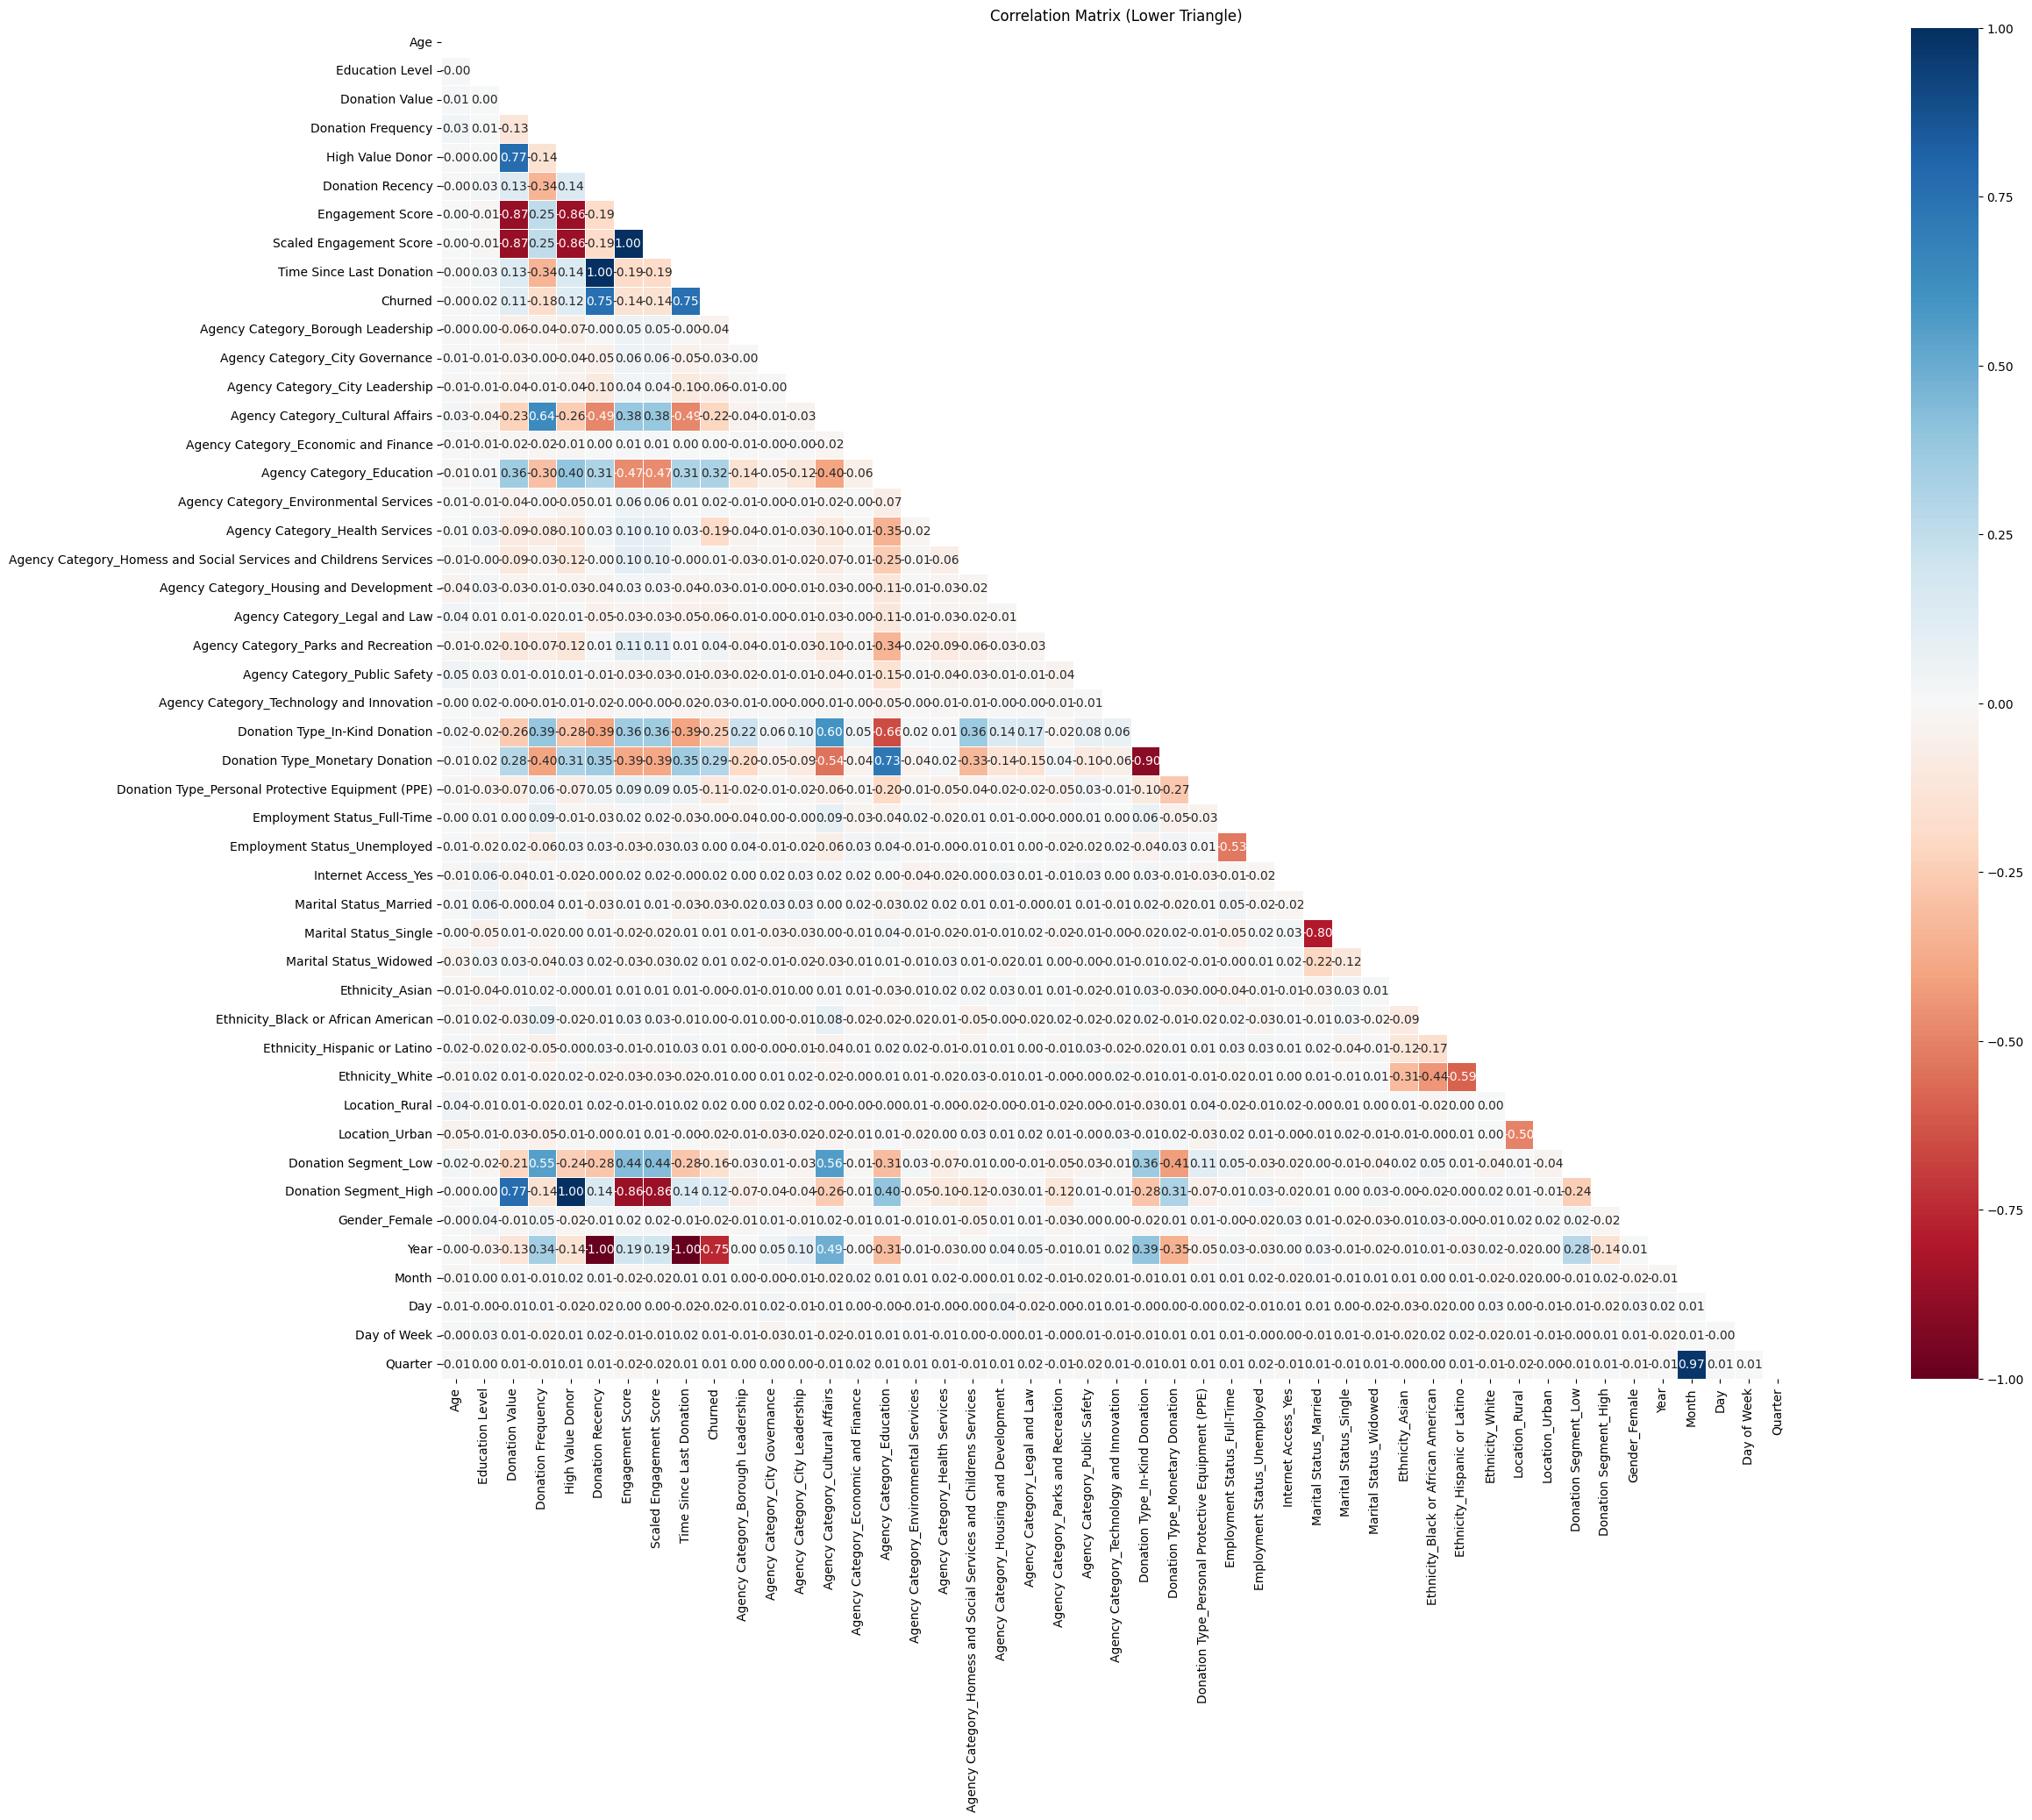

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = dfprocessed2.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(35, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu', fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=0.5, annot_kws={"size": 10})

# Add title
plt.title('Correlation Matrix (Lower Triangle)')

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Compute the correlation matrix
correlation_matrix = dfprocessed2.corr()

# Create a mask for the upper triangle to avoid duplicate pairs
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Get the correlation matrix without the upper triangle
corr_long = correlation_matrix.where(~mask).stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations (where Feature1 == Feature2)
corr_long = corr_long[corr_long['Feature1'] != corr_long['Feature2']]

# Sort the correlations by absolute value in descending order
corr_long['AbsCorrelation'] = corr_long['Correlation'].abs()
top_corr = corr_long.sort_values(by='AbsCorrelation', ascending=False).head(10)

# Display the top correlated feature pairs
print(top_corr)



                             Feature1                        Feature2  \
784             Donation Segment_High                High Value Donor   
869                              Year        Time Since Last Donation   
866                              Year                Donation Recency   
33           Time Since Last Donation                Donation Recency   
27            Scaled Engagement Score                Engagement Score   
1078                          Quarter                           Month   
324   Donation Type_Monetary Donation  Donation Type_In-Kind Donation   
23            Scaled Engagement Score                  Donation Value   
17                   Engagement Score                  Donation Value   
25            Scaled Engagement Score                High Value Donor   

      Correlation  AbsCorrelation  
784      1.000000        1.000000  
869     -1.000000        1.000000  
866     -1.000000        1.000000  
33       1.000000        1.000000  
27       1.00000

In [ ]:
dfprocessed2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 47 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Age                                                                4342 non-null   float64
 1   Education Level                                                    4343 non-null   Int64  
 2   Donation Value                                                     4343 non-null   float64
 3   Donation Frequency                                                 4343 non-null   float64
 4   High Value Donor                                                   4343 non-null   float64
 5   Donation Recency                                                   4343 non-null   float64
 6   Engagement Score                                                   4343 non-null   float64
 7   Scaled Engagement Score      

In [ ]:
# Impute missing values with the mean
dfprocessed2['Age'] = dfprocessed2['Age'].fillna(dfprocessed2['Age'].mean())

# **2.1 Simple Regression Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target variable and features
X = dfprocessed2.drop(columns=['Donation Value'])
y = dfprocessed2['Donation Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.21
R^2 Score: 0.79


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a copy of the dataframe
dfprocessed2_copy = dfprocessed2.copy()

# Drop specific columns and columns starting with 'Agency'
columns_to_drop = ['Year', 'Month', 'Day', 'Day of Week', 'Quarter', 'Churned',
                    'Agency Category_Borough Leadership', 'Agency Category_City Governance',
                    'Agency Category_City Leadership']

# Add columns starting with 'Agency' to the list of columns to drop
columns_to_drop += [col for col in dfprocessed2_copy.columns if col.startswith('Agency')]

# Drop the specified columns
dfprocessed2_copy = dfprocessed2_copy.drop(columns=columns_to_drop)


# Define target variable and features
X = dfprocessed2_copy.drop(columns=['Donation Value'])
y = dfprocessed2_copy['Donation Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.21
R^2 Score: 0.79


In [ ]:
# Get feature names
feature_names = X.columns

# Get model coefficients
coefficients = model.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                                              Feature  Coefficient
23                               Donation Segment_Low     0.209588
16                             Marital Status_Widowed     0.025666
14                             Marital Status_Married     0.014618
15                              Marital Status_Single     0.008605
7                            Time Since Last Donation     0.007998
4                                    Donation Recency     0.007998
11                        Employment Status_Full-Time     0.007927
25                                      Gender_Female     0.004216
21                                     Location_Rural     0.002766
19                       Ethnicity_Hispanic or Latino     0.002612
2                                  Donation Frequency     0.002135
0                                                 Age     0.001867
22                                     Location_Urban    -0.001060
1                                     Education Level    -0.00

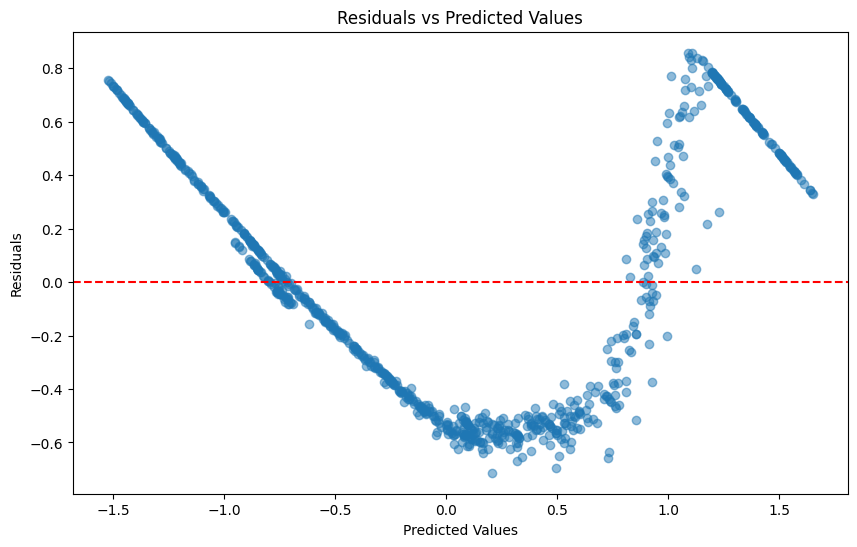

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-Validation MSE: {-cv_scores.mean()}")


Cross-Validation MSE Scores: [0.2778186  0.21820324 0.22469649 0.18243372 0.16351196]
Mean Cross-Validation MSE: 0.21333280245526537


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Initialize Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Set up hyperparameter grids
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Grid search for Ridge
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

# Grid search for Lasso
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

# Print best parameters and scores
print(f"Best Ridge Parameters: {grid_search_ridge.best_params_}")
print(f"Best Ridge Score: {-grid_search_ridge.best_score_}")

print(f"Best Lasso Parameters: {grid_search_lasso.best_params_}")
print(f"Best Lasso Score: {-grid_search_lasso.best_score_}")


Best Ridge Parameters: {'alpha': 10}
Best Ridge Score: 0.20750737021262075
Best Lasso Parameters: {'alpha': 0.01}
Best Lasso Score: 0.20711002524568078


# **2.2 Polynomial Regression Model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Define polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline with polynomial features and linear regression
model_poly = make_pipeline(poly, LinearRegression())

# Fit the model
model_poly.fit(X_train_scaled, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test_scaled)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression MSE: {mse_poly}")
print(f"Polynomial Regression R^2 Score: {r2_poly}")

Polynomial Regression MSE: 0.023422147394340998
Polynomial Regression R^2 Score: 0.9768188741152577


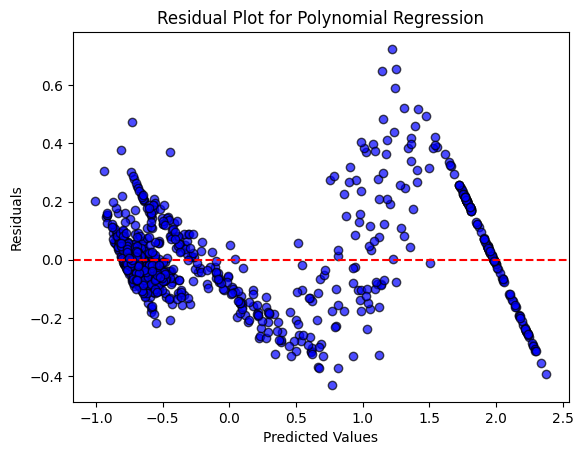

In [ ]:
import matplotlib.pyplot as plt

# Fit the polynomial model
model_poly.fit(X_train_scaled, y_train)

# Make predictions
y_pred_poly = model_poly.predict(X_test_scaled)

# Calculate residuals
residuals_poly = y_test - y_pred_poly

# Plot residuals
plt.scatter(y_pred_poly, residuals_poly, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Regression')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
model_poly = make_pipeline(poly, LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(model_poly, X, y, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean Cross-Validation MSE: {-cv_scores.mean()}")


Cross-Validation MSE Scores: [3.63582144e-02 6.57915303e+21 2.23753176e-02 1.91832688e-02
 5.56449787e-02]
Mean Cross-Validation MSE: 1.3158306058531342e+21


# **2.3 Ridge Regression Model**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Define target variable and features
X = dfprocessed2.drop(columns=['Donation Value'])
y = dfprocessed2['Donation Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=10)  # You can tune alpha based on previous results
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Perform cross-validation
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2 Score: {r2_ridge}")
print(f"Cross-Validation MSE Scores: {-cv_scores_ridge}")
print(f"Mean Cross-Validation MSE: {-cv_scores_ridge.mean()}")


Ridge Regression MSE: 0.21001629513585865
Ridge Regression R^2 Score: 0.7921448408027787
Cross-Validation MSE Scores: [0.27311871 0.21273707 0.22290936 0.17499194 0.16074904]
Mean Cross-Validation MSE: 0.2089012241544384


# **2.4 Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Define target variable and features
X = dfprocessed2.drop(columns=['Donation Value'])
y = dfprocessed2['Donation Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

# Perform cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Random Forest Cross-Validation MSE Scores: {-cv_scores_rf}")
print(f"Mean Random Forest Cross-Validation MSE: {-cv_scores_rf.mean()}")


Random Forest MSE: 4.378811333523798e-06
Random Forest R^2 Score: 0.9999956662480584
Random Forest Cross-Validation MSE Scores: [5.88998052e-06 4.86639919e-06 5.16694156e-06 3.40757494e-06
 3.56215979e-06]
Mean Random Forest Cross-Validation MSE: 4.578611200232191e-06


# **3 Clustering Segments**

# **3.1 Donation Behavior Segmentation**

In [ ]:
dfRe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

In [ ]:
dfCl = dfRe.copy()


In [ ]:
dfCl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

In [ ]:
dfCl.head()

,Agency Name,Name of Donor (Individual or Firm),Agency Category,Donation Type,Unique Identifier,Gender,Age,Education Level,Employment Status,Internet Access,Marital Status,Ethnicity,Location,Donation Value,Donation Segment,Donation Frequency,High Value Donor,Donation Recency,Engagement Score,Scaled Engagement Score,Time Since Last Donation,Churned,Date
0,Administration for Children's Services,Rx Plus Pharmacy,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_1,Male,32.0,College,Full-Time,Yes,Widowed,White,Urban,12564.0,Medium,1,0,3,2998.0,69.055300,3,1,2019-03-28
1,Administration for Children's Services,Glam4Good,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_2,Male,38.0,Doctorate,Full-Time,Yes,Married,White,Urban,27462.0,Medium,2,0,3,2374.0,54.677419,3,1,2019-07-04
2,Administration for Children's Services,Pajamas & Book Program,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_3,Male,42.0,College,Full-Time,Yes,Married,White,Urban,24388.0,Medium,2,0,3,2500.0,57.580645,3,1,2019-06-22
3,Administration for Children's Services,Tickets for Kids,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_4,Male,29.0,College,Full-Time,Yes,Married,Hispanic or Latino,Urban,89779.0,High,3,1,3,1569.0,36.129032,3,1,2019-02-05
4,Administration for Children's Services,New York Mets,Homess and Social Services and Childrens Services,In-Kind Donation,DONOR_5,Male,30.0,College,Full-Time,Yes,Married,White,Urban,12750.0,Medium,3,0,3,2991.0,68.894009,3,1,2019-01-25


In [ ]:
# prompt: drop the null row in the missing value of age in df dfcl

dfCl.dropna(subset=['Age'], inplace=True)


In [ ]:
dfCl = dfCl.drop(columns=['Date'])

In [ ]:
# Check for missing values in each column
missing_values = dfCl.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming dfCl is your DataFrame
features = ['Age', 'Donation Value', 'Donation Frequency', 'Scaled Engagement Score', 'Time Since Last Donation']

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfCl[features])


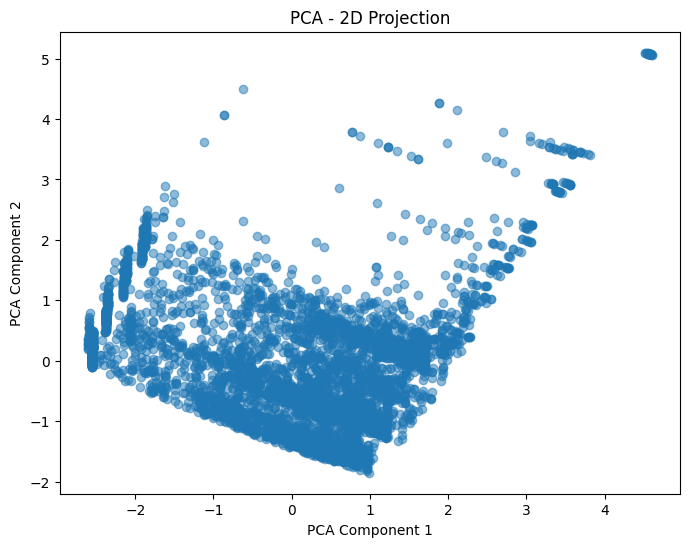

In [ ]:
# Reduce to 2 dimensions with PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Optionally, visualize the data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
plt.title('PCA - 2D Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

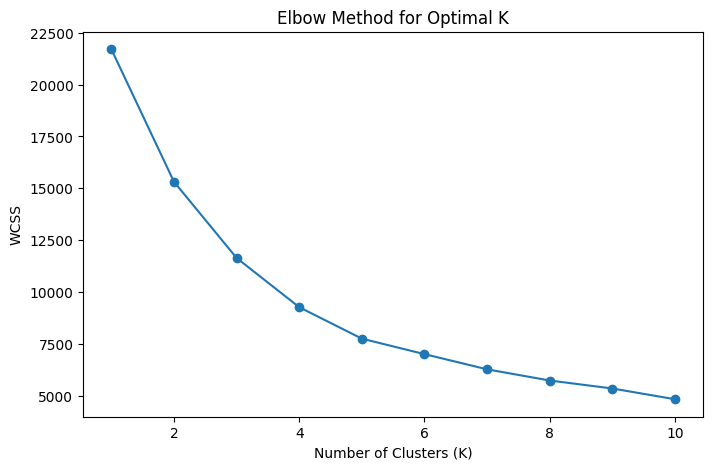

In [ ]:
# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):  # Adjust range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Use scaled data for KMeans
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


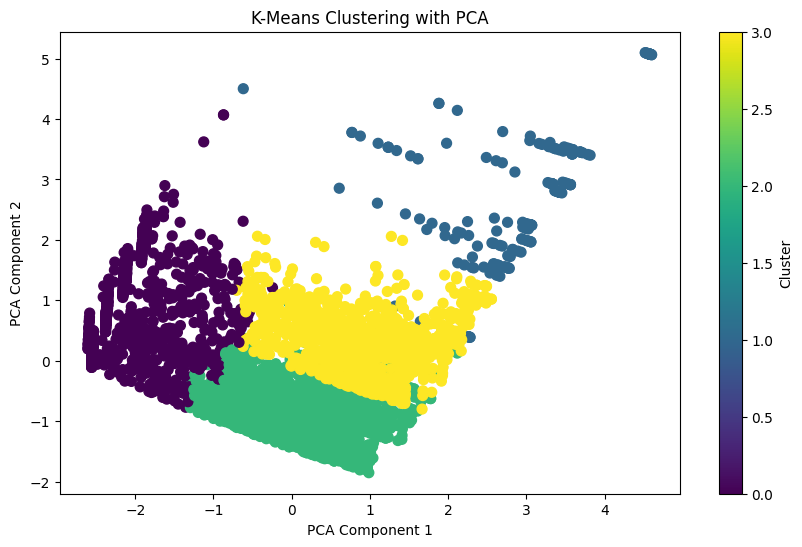

In [ ]:
# Choose the optimal number of clusters from the Elbow Method
optimal_k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)  # Using scaled data for clustering

# Add the cluster labels to your original DataFrame
dfCl['Cluster'] = clusters

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
dfCl['PCA1'] = df_pca[:, 0]
dfCl['PCA2'] = df_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(dfCl['PCA1'], dfCl['PCA2'], c=dfCl['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()


In [ ]:
# Calculate the silhouette score
score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.3124241549847644


In [ ]:
# Select only numeric columns for clustering summary
numeric_columns = dfCl.select_dtypes(include=[np.number])

# Add the 'Cluster' column back to the numeric data
numeric_columns['Cluster'] = dfCl['Cluster']

# Group by the 'Cluster' column and calculate the mean
cluster_summary = numeric_columns.groupby('Cluster').mean()

# Display the summary
print("Numeric Columns Summary:")
print(cluster_summary)


Numeric Columns Summary:
               Age  Donation Value  Donation Frequency  High Value Donor  \
Cluster                                                                    
0        35.506579   332173.913985            1.422932          1.000000   
1        36.791667    15940.578021           12.380208          0.098958   
2        35.152893    40724.979168            1.246901          0.300103   
3        35.110435    35512.071078            1.626957          0.246087   

         Donation Recency  Engagement Score  Scaled Engagement Score  \
Cluster                                                                
0                1.884398        535.842105                12.323551   
1                0.098958       3696.898438                85.158950   
2                2.460744       2570.210227                59.198392   
3                0.355652       2759.493478                63.559758   

         Time Since Last Donation   Churned      PCA1      PCA2  
Cluster            

# **3.2 Donor Segmentation**

In [ ]:
dfClDonor = dfRe.copy()


In [ ]:
dfClDonor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

In [ ]:
# prompt: for the datafram dfClDonor drop Agency Name, Name of Donor (Individual or Firm), Unique Identifier, Date

dfClDonor = dfClDonor.drop(columns=['Agency Name', 'Name of Donor (Individual or Firm)', 'Unique Identifier', 'Date'])


In [ ]:
dfClDonor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Agency Category           4343 non-null   object  
 1   Donation Type             4343 non-null   object  
 2   Gender                    4343 non-null   object  
 3   Age                       4342 non-null   float64 
 4   Education Level           4343 non-null   object  
 5   Employment Status         4343 non-null   object  
 6   Internet Access           4343 non-null   object  
 7   Marital Status            4343 non-null   object  
 8   Ethnicity                 4343 non-null   object  
 9   Location                  4343 non-null   object  
 10  Donation Value            4343 non-null   float64 
 11  Donation Segment          4343 non-null   category
 12  Donation Frequency        4343 non-null   int64   
 13  High Value Donor          4343 non-null   int64   
 1

In [ ]:
# prompt: drop the null row in the missing value of age in df dfcl

dfClDonor.dropna(subset=['Age'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
# Define the demographic columns
demographic_features = [
    'Gender', 'Age', 'Education Level', 'Employment Status',
    'Internet Access', 'Marital Status', 'Ethnicity', 'Location'
]

# Separate features
df_demo = dfClDonor[demographic_features]



In [ ]:
# Define categorical features
categorical_features = ['Gender', 'Education Level', 'Employment Status',
                         'Internet Access', 'Marital Status', 'Ethnicity', 'Location']

# Fill missing values in categorical columns
df_demo[categorical_features] = df_demo[categorical_features].fillna(df_demo[categorical_features].mode().iloc[0])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(df_demo)


<ipython-input-111-9534815e5ad7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo[categorical_features] = df_demo[categorical_features].fillna(df_demo[categorical_features].mode().iloc[0])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

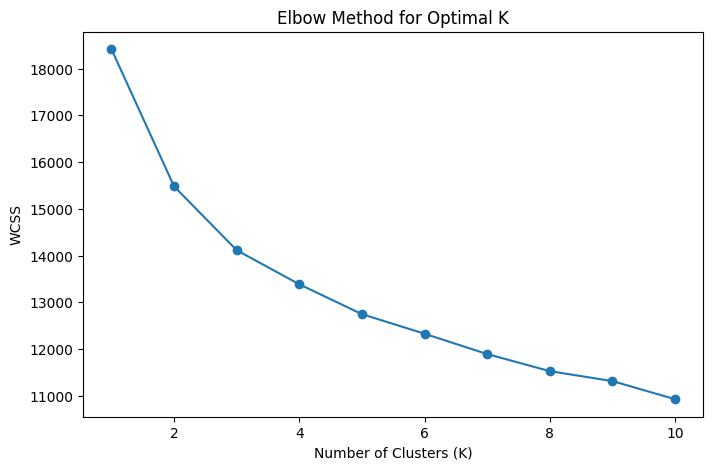

In [ ]:
# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):  # Adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
# Assuming you determined k=3 from the Elbow Method
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dfClDonor['Demographic Cluster'] = kmeans.fit_predict(X_preprocessed)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


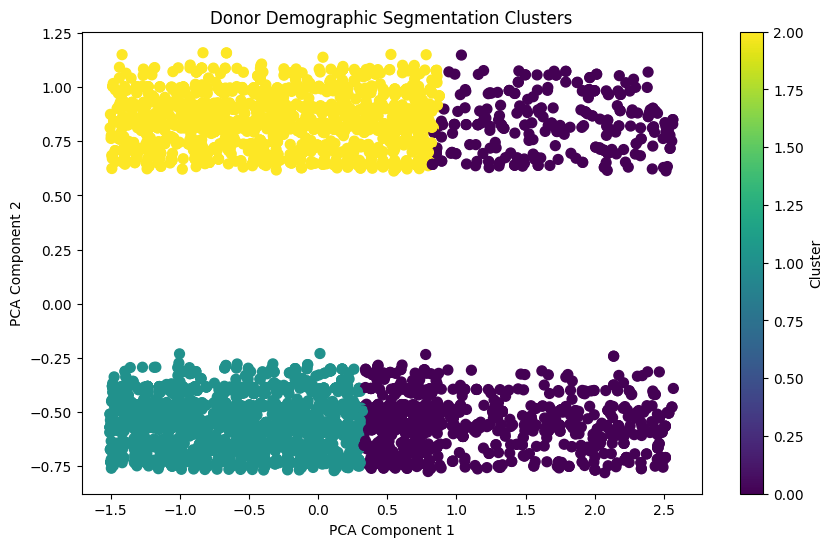

In [ ]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)
dfClDonor['PCA1'] = X_pca[:, 0]
dfClDonor['PCA2'] = X_pca[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(dfClDonor['PCA1'], dfClDonor['PCA2'], c=dfClDonor['Demographic Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Donor Demographic Segmentation Clusters')
plt.show()


In [ ]:
score = silhouette_score(X_preprocessed, dfClDonor['Demographic Cluster'])
print(f'Silhouette Score: {score}')


Silhouette Score: 0.1300716620397944


In [ ]:
# Separate numeric and non-numeric columns
numeric_columns = dfClDonor.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = dfClDonor.select_dtypes(include=['object', 'category']).columns

# Calculate mean for numeric columns
numeric_summary = dfClDonor.groupby('Demographic Cluster')[numeric_columns].mean()

# For non-numeric columns, summarize by count or mode
non_numeric_summary = dfClDonor.groupby('Demographic Cluster')[non_numeric_columns].agg(lambda x: x.mode()[0] if not x.mode().empty else 'No Mode')

print("Numeric Columns Summary:")
print(numeric_summary)

print("\nNon-Numeric Columns Summary:")
print(non_numeric_summary)


Numeric Columns Summary:
                           Age  Donation Value  Donation Frequency  \
Demographic Cluster                                                  
0                    49.772016   107785.586140            2.226337   
1                    28.002392   109265.167919            1.717703   
2                    31.603436   111701.188282            1.786254   

                     High Value Donor  Donation Recency  Engagement Score  \
Demographic Cluster                                                         
0                            0.441975          1.614815       2204.936626   
1                            0.445574          1.678230       2169.748505   
2                            0.457045          1.669416       2146.025773   

                     Scaled Engagement Score  Time Since Last Donation  \
Demographic Cluster                                                      
0                                  50.781950                  1.614815   
1               

# **4 Time Series Analysis**

# **4.1 Simple Linear Regression**


In [ ]:
dfRe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

In [ ]:
dfSRTS = dfRe.copy()

In [ ]:
dfSRTS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

Model Coefficients: [-43.53822036]
Model Intercept: 32229499.77590919
R-squared Score: 0.002676728868275857
Mean Squared Error: 18334906128.48263


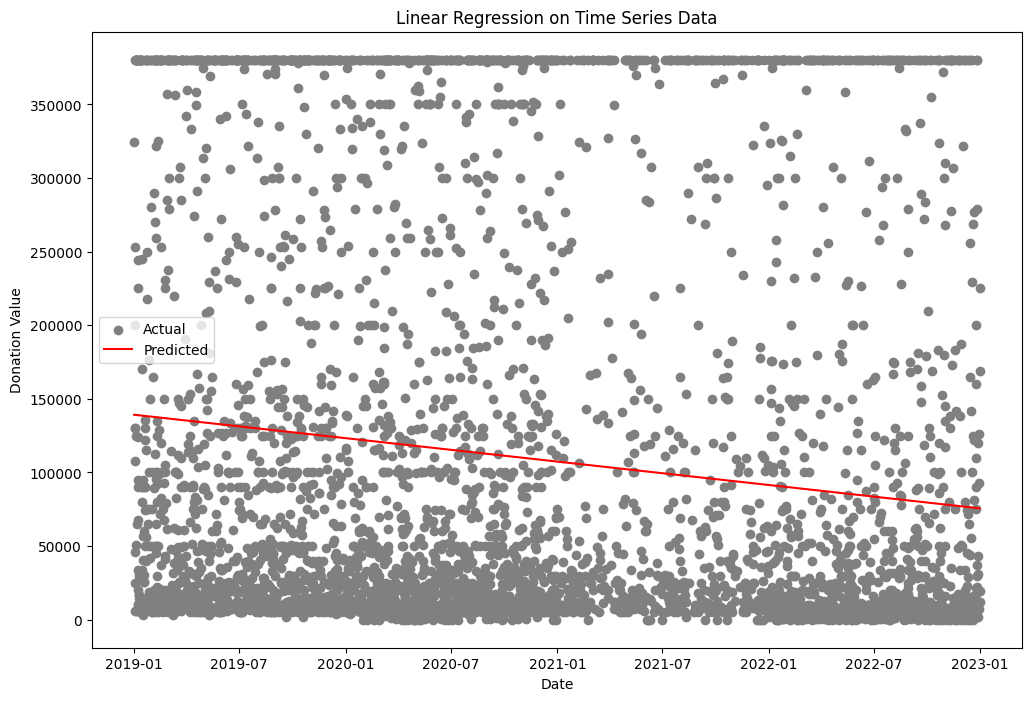

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample DataFrame dfSRTS (assuming it's already loaded)
# Convert 'Date' to datetime format
dfSRTS['Date'] = pd.to_datetime(dfSRTS['Date'], format='%d/%m/%Y')

# Sort the DataFrame by date
dfSRTS = dfSRTS.sort_values(by='Date')

# Extract the target variable and feature
dfSRTS['Date_ordinal'] = dfSRTS['Date'].map(pd.Timestamp.toordinal)

# Define X and y
X = dfSRTS[['Date_ordinal']]
y = dfSRTS['Donation Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Model Summary
print("Model Coefficients:", linear_model.coef_)
print("Model Intercept:", linear_model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot actual values
plt.scatter(dfSRTS['Date'], dfSRTS['Donation Value'], color='gray', label='Actual')

# Plot predicted values
plt.plot(dfSRTS['Date'], linear_model.predict(dfSRTS[['Date_ordinal']]), color='red', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Donation Value')
plt.title('Linear Regression on Time Series Data')
plt.legend()
plt.show()

In [ ]:
dfSRTSEnhanced = dfRe.copy()


Model Coefficients: [-17140.17798234    251.78239836   -215.50730488    420.68976336]
Model Intercept: 34737786.41054579
R-squared Score: 0.0005955738049310266
Mean Squared Error: 19294983189.430054


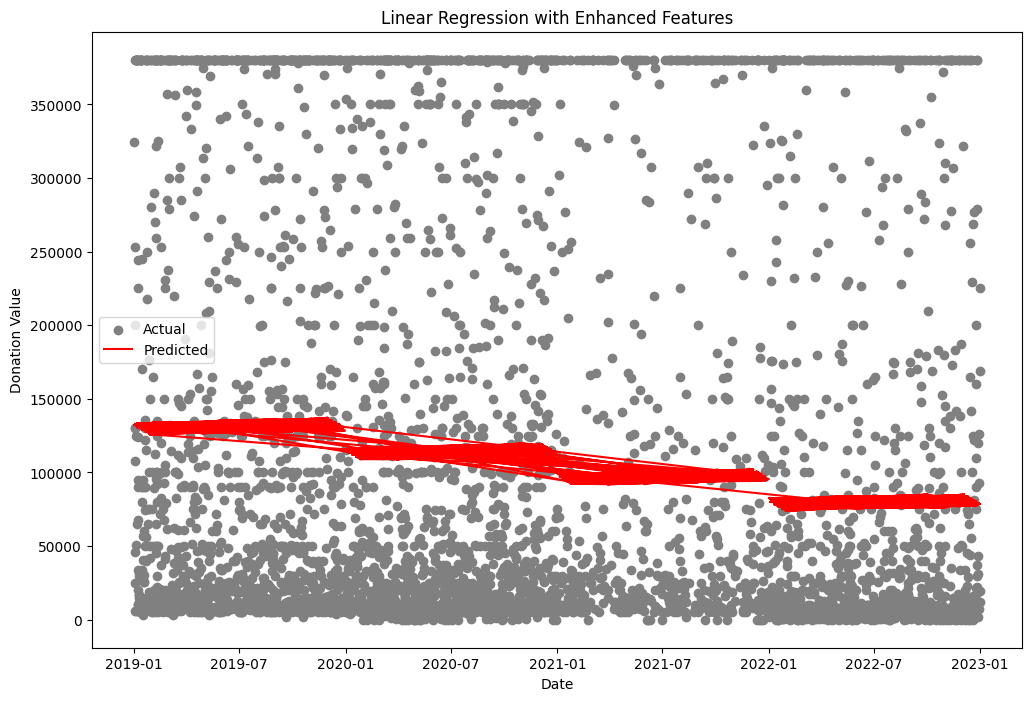

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Assuming dfSRTSEnhanced is already loaded

# Convert 'Date' to datetime format
dfSRTSEnhanced['Date'] = pd.to_datetime(dfSRTSEnhanced['Date'], format='%d/%m/%Y')

# Extract date components
dfSRTSEnhanced['Year'] = dfSRTSEnhanced['Date'].dt.year
dfSRTSEnhanced['Month'] = dfSRTSEnhanced['Date'].dt.month
dfSRTSEnhanced['Day'] = dfSRTSEnhanced['Date'].dt.day
dfSRTSEnhanced['DayOfWeek'] = dfSRTSEnhanced['Date'].dt.dayofweek

# # Create rolling averages (e.g., 7-day rolling average)
# dfSRTSEnhanced['Rolling_Avg'] = dfSRTSEnhanced['Donation Value'].rolling(window=7).mean().fillna(method='bfill')

# Define features
features = ['Year', 'Month', 'Day', 'DayOfWeek']
X = dfSRTSEnhanced[features]
y = dfSRTSEnhanced['Donation Value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred = linear_model.predict(X_test)

# Model Summary
print("Model Coefficients:", linear_model.coef_)
print("Model Intercept:", linear_model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plotting results
plt.figure(figsize=(12, 8))

# Scatter plot of actual values
plt.scatter(dfSRTSEnhanced['Date'], dfSRTSEnhanced['Donation Value'], color='gray', label='Actual')

# Predict over the entire range
plt.plot(dfSRTSEnhanced['Date'], linear_model.predict(dfSRTSEnhanced[features]), color='red', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Donation Value')
plt.title('Linear Regression with Enhanced Features')
plt.legend()
plt.show()


# **4.2 ARIMA Time Series**

In [ ]:
dfATS = dfRe.copy()


In [ ]:
dfATS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4343 entries, 0 to 4565
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Agency Name                         4343 non-null   object        
 1   Name of Donor (Individual or Firm)  4343 non-null   object        
 2   Agency Category                     4343 non-null   object        
 3   Donation Type                       4343 non-null   object        
 4   Unique Identifier                   4343 non-null   object        
 5   Gender                              4343 non-null   object        
 6   Age                                 4342 non-null   float64       
 7   Education Level                     4343 non-null   object        
 8   Employment Status                   4343 non-null   object        
 9   Internet Access                     4343 non-null   object        
 10  Marital Status               

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Sample DataFrame dfATS (assuming it's already loaded)
# Convert 'Date' to datetime format
dfATS['Date'] = pd.to_datetime(dfATS['Date'], format='%d/%m/%Y')

# Set 'Date' as the index
dfATS.set_index('Date', inplace=True)

# Sort the DataFrame by date
dfATS = dfATS.sort_index()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(dfATS['Donation Value'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value is high (greater than 0.05), the data is not stationary and may need differencing.


ADF Statistic: -29.681602445302726
p-value: 0.0


In [ ]:
# Ensure there are no duplicate dates
dfATS = dfATS[~dfATS.index.duplicated(keep='first')]

# Set frequency for the date index
dfATS = dfATS.asfreq('D')


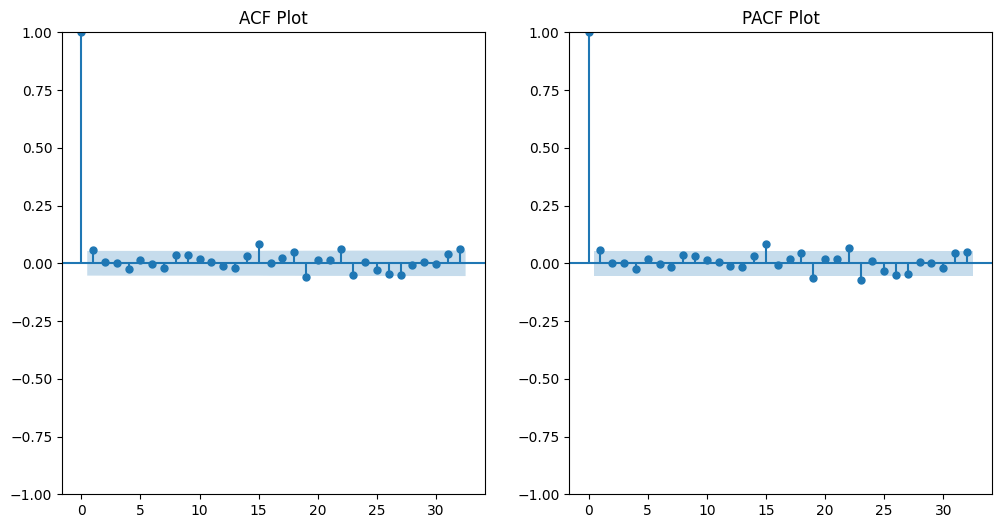

                               SARIMAX Results                                
Dep. Variable:         Donation Value   No. Observations:                 1461
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -17859.463
Date:                Tue, 03 Sep 2024   AIC                          35726.926
Time:                        17:49:36   BIC                          35748.074
Sample:                    01-01-2019   HQIC                         35734.815
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.119e+05   3912.876     28.605      0.000    1.04e+05     1.2e+05
ar.L1         -0.5521      0.305     -1.809      0.070      -1.150       0.046
ma.L1          0.6051      0.293      2.062      0.0

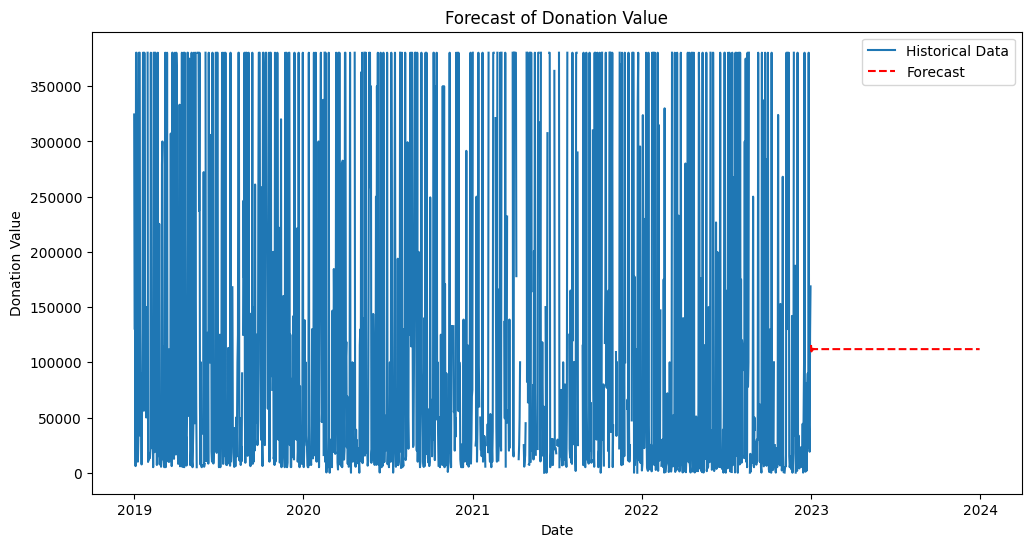

In [ ]:

# Determine p and q using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(dfATS['Donation Value'].dropna(), ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(dfATS['Donation Value'].dropna(), ax=plt.gca())
plt.title('PACF Plot')

plt.show()

# Fit the ARIMA model (order can be adjusted based on ACF and PACF results)
model = ARIMA(dfATS['Donation Value'], order=(1, 0, 1))  # Example order, adjust as needed
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecasting
forecast_steps = 365  # Number of periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Values:")
print(forecast)

# Generate a date range for the forecast
forecast_index = pd.date_range(start=dfATS.index[-1], periods=forecast_steps + 1, inclusive='right')

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(dfATS.index, dfATS['Donation Value'], label='Historical Data')
plt.plot(forecast_index, forecast, color='red', linestyle='--', label='Forecast')
plt.title('Forecast of Donation Value')
plt.xlabel('Date')
plt.ylabel('Donation Value')
plt.legend()
plt.show()


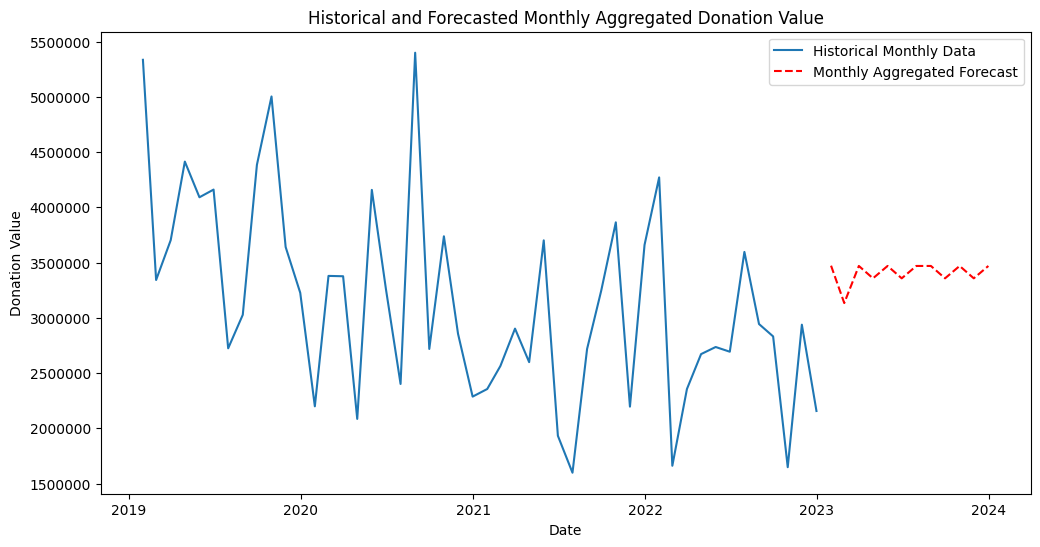

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Continue from your existing code

# Resample the historical data to monthly sums
historical_monthly = dfATS['Donation Value'].resample('M').sum()

# Resample the forecasted daily data to monthly sums
forecast_daily = pd.Series(forecast, index=forecast_index)
forecast_monthly = forecast_daily.resample('M').sum()

# Generate the corresponding date range for the monthly forecast data
forecast_monthly_index = pd.date_range(start=forecast_daily.index[0], periods=len(forecast_monthly), freq='M')

# Plot the historical monthly aggregated data and the forecasted monthly data
plt.figure(figsize=(12, 6))
plt.plot(historical_monthly.index, historical_monthly, label='Historical Monthly Data')
plt.plot(forecast_monthly_index, forecast_monthly, color='red', linestyle='--', label='Monthly Aggregated Forecast')

# Formatting the y-axis to display values as dollars
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Historical and Forecasted Monthly Aggregated Donation Value')
plt.xlabel('Date')
plt.ylabel('Donation Value')
plt.legend()
plt.show()
